# Churn Prediction For Bank Customer

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Indest Data

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [15]:
df.isnull().any().any()

False

<AxesSubplot:>

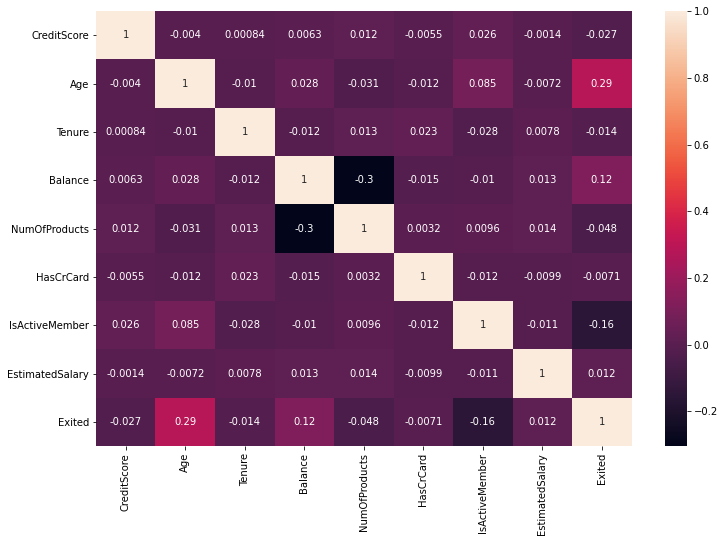

In [37]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot=True)

### Dropping first three columns

In [7]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

### CreditScore

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

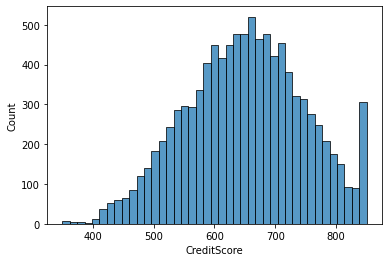

In [8]:
sns.histplot(data=df, x="CreditScore")

### Geography

We will dummy this column

In [9]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### Gender

We will dummy this column

In [10]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

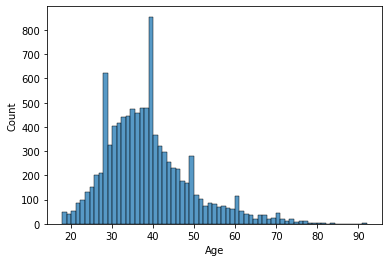

In [11]:
sns.histplot(data=df, x="Age")

### Tenure

In [16]:
df.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

### Balance

<AxesSubplot:xlabel='Balance', ylabel='Count'>

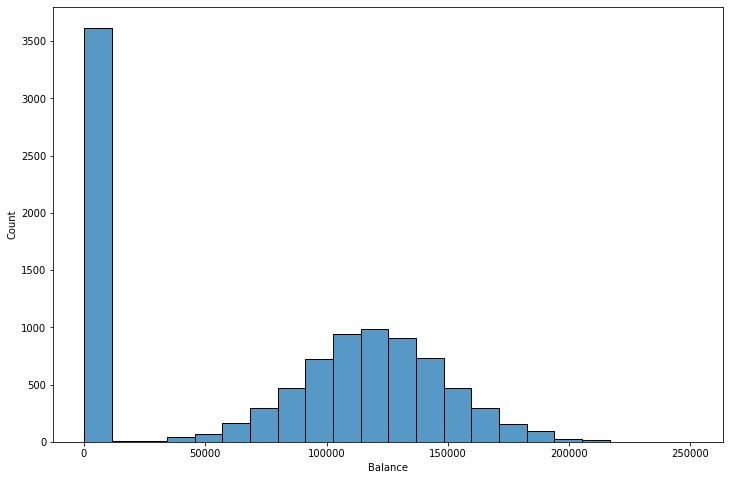

In [25]:
plt.figure(figsize=(12,8))

sns.histplot(data=df, x="Balance")

<AxesSubplot:xlabel='Balance'>

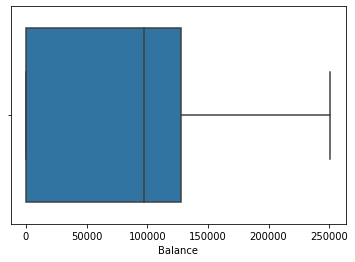

In [27]:
sns.boxplot(data=df, x="Balance")

In [26]:
df[df.Balance < 10000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0


### NumOfProducts

In [29]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

### HasCrCard

In [30]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

### IsActiveMember

In [31]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

### EstimatedSalary

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

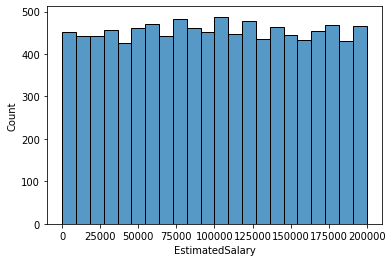

In [34]:
sns.histplot(data=df, x="EstimatedSalary")

<AxesSubplot:xlabel='EstimatedSalary'>

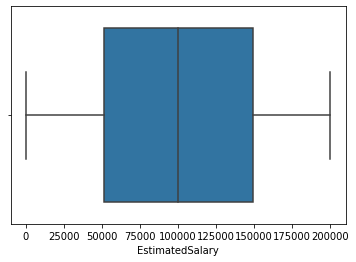

In [35]:
sns.boxplot(data=df, x="EstimatedSalary")

### Exited

In [53]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Converting to dummies

In [42]:
df_dummied = pd.get_dummies(df, drop_first=True)

In [49]:
df_dummied.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


In [50]:
df_dummied.shape

(10000, 12)

## Preprocessing of Data
- Train | Test Split, Scalling

In [45]:
X = df_dummied.drop("Exited", axis=1)
y = df_dummied["Exited"]

In [46]:
X.shape

(10000, 11)

In [51]:
y.shape

(10000,)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
scaler = MinMaxScaler()

In [56]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

### Creating Model

### without class_weigth

In [58]:
X_train_scaled.shape

(8000, 11)

In [321]:
model = Sequential()

model.add(Dense(40, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [322]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

#### Evaluate

In [323]:
model.fit(x = X_train_scaled, y = y_train, validation_split = 0.1, batch_size = 32,
          epochs = 1000, verbose=1, callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 1s 904us/step - loss: 0.5356 - accuracy: 0.7817 - val_loss: 0.4613 - val_accuracy: 0.8037
Epoch 2/1000
225/225 [==============================] - 0s 592us/step - loss: 0.4972 - accuracy: 0.7935 - val_loss: 0.4491 - val_accuracy: 0.8037
Epoch 3/1000
225/225 [==============================] - 0s 588us/step - loss: 0.4946 - accuracy: 0.7939 - val_loss: 0.4380 - val_accuracy: 0.8037
Epoch 4/1000
225/225 [==============================] - 0s 606us/step - loss: 0.4752 - accuracy: 0.7965 - val_loss: 0.4295 - val_accuracy: 0.8037
Epoch 5/1000
225/225 [==============================] - 0s 579us/step - loss: 0.4780 - accuracy: 0.7947 - val_loss: 0.4432 - val_accuracy: 0.8037
Epoch 6/1000
225/225 [==============================] - 0s 570us/step - loss: 0.4649 - accuracy: 0.7962 - val_loss: 0.4175 - val_accuracy: 0.8037
Epoch 7/1000
225/225 [==============================] - 0s 592us/step - loss: 0.4611 - accuracy: 0.7987 - val_loss: 0.4062 -

Epoch 57/1000
225/225 [==============================] - 0s 570us/step - loss: 0.4069 - accuracy: 0.8261 - val_loss: 0.3511 - val_accuracy: 0.8625
Epoch 58/1000
225/225 [==============================] - 0s 570us/step - loss: 0.4088 - accuracy: 0.8265 - val_loss: 0.3582 - val_accuracy: 0.8575
Epoch 59/1000
225/225 [==============================] - 0s 570us/step - loss: 0.4116 - accuracy: 0.8244 - val_loss: 0.3512 - val_accuracy: 0.8650
Epoch 60/1000
225/225 [==============================] - 0s 579us/step - loss: 0.4136 - accuracy: 0.8261 - val_loss: 0.3499 - val_accuracy: 0.8650
Epoch 61/1000
225/225 [==============================] - 0s 570us/step - loss: 0.4102 - accuracy: 0.8278 - val_loss: 0.3578 - val_accuracy: 0.8550
Epoch 62/1000
225/225 [==============================] - 0s 574us/step - loss: 0.4138 - accuracy: 0.8200 - val_loss: 0.3596 - val_accuracy: 0.8550
Epoch 63/1000
225/225 [==============================] - 0s 579us/step - loss: 0.4116 - accuracy: 0.8210 - val_loss: 0

In [324]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (32, 40)                  480       
_________________________________________________________________
dropout_56 (Dropout)         (32, 40)                  0         
_________________________________________________________________
dense_111 (Dense)            (32, 20)                  820       
_________________________________________________________________
dropout_57 (Dropout)         (32, 20)                  0         
_________________________________________________________________
dense_112 (Dense)            (32, 10)                  210       
_________________________________________________________________
dropout_58 (Dropout)         (32, 10)                  0         
_________________________________________________________________
dense_113 (Dense)            (32, 1)                 

In [325]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.536,0.782,0.461,0.804
1,0.497,0.793,0.449,0.804
2,0.495,0.794,0.438,0.804
3,0.475,0.797,0.429,0.804
4,0.478,0.795,0.443,0.804


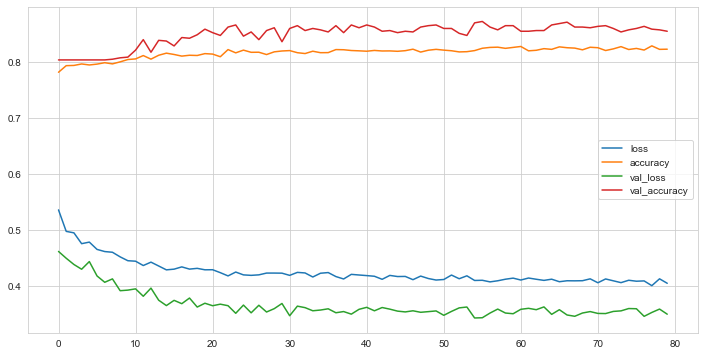

In [326]:
loss_df.plot();

In [328]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  27838.763671875
accuracy :  0.45350000262260437


In [329]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[614 993]
 [100 293]]
              precision    recall  f1-score   support

           0       0.86      0.38      0.53      1607
           1       0.23      0.75      0.35       393

    accuracy                           0.45      2000
   macro avg       0.54      0.56      0.44      2000
weighted avg       0.74      0.45      0.49      2000



### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [369]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced', np.unique(y_train), 
                y_train))) 

In [384]:
model = Sequential()

model.add(Dense(40, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))


opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [385]:
model.fit(x = X_train_scaled, y = y_train, validation_split = 0.1, batch_size = 32,
          epochs = 1000, verbose=1, callbacks = [early_stop], class_weight=class_weights)

Epoch 1/1000
225/225 [==============================] - 0s 923us/step - loss: 0.6967 - accuracy: 0.4625 - val_loss: 0.7045 - val_accuracy: 0.4212
Epoch 2/1000
225/225 [==============================] - 0s 623us/step - loss: 0.6861 - accuracy: 0.4610 - val_loss: 0.6642 - val_accuracy: 0.5987
Epoch 3/1000
225/225 [==============================] - 0s 614us/step - loss: 0.6749 - accuracy: 0.5075 - val_loss: 0.6935 - val_accuracy: 0.5412
Epoch 4/1000
225/225 [==============================] - 0s 650us/step - loss: 0.6569 - accuracy: 0.5667 - val_loss: 0.6360 - val_accuracy: 0.7225
Epoch 5/1000
225/225 [==============================] - 0s 606us/step - loss: 0.6494 - accuracy: 0.5883 - val_loss: 0.6635 - val_accuracy: 0.6225
Epoch 6/1000
225/225 [==============================] - 0s 610us/step - loss: 0.6458 - accuracy: 0.5986 - val_loss: 0.6196 - val_accuracy: 0.6850
Epoch 7/1000
225/225 [==============================] - 0s 610us/step - loss: 0.6297 - accuracy: 0.6282 - val_loss: 0.6113 -

225/225 [==============================] - 0s 614us/step - loss: 0.5448 - accuracy: 0.7156 - val_loss: 0.4576 - val_accuracy: 0.7862
Epoch 57/1000
225/225 [==============================] - 0s 597us/step - loss: 0.5509 - accuracy: 0.7215 - val_loss: 0.5333 - val_accuracy: 0.7175
Epoch 58/1000
225/225 [==============================] - 0s 597us/step - loss: 0.5423 - accuracy: 0.7156 - val_loss: 0.4512 - val_accuracy: 0.7763
Epoch 59/1000
225/225 [==============================] - 0s 601us/step - loss: 0.5389 - accuracy: 0.7122 - val_loss: 0.4887 - val_accuracy: 0.7350
Epoch 60/1000
225/225 [==============================] - 0s 606us/step - loss: 0.5417 - accuracy: 0.7167 - val_loss: 0.4784 - val_accuracy: 0.7500
Epoch 61/1000
225/225 [==============================] - 0s 601us/step - loss: 0.5525 - accuracy: 0.6908 - val_loss: 0.5431 - val_accuracy: 0.6900
Epoch 62/1000
225/225 [==============================] - 0s 597us/step - loss: 0.5446 - accuracy: 0.7258 - val_loss: 0.4936 - val_ac

In [386]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (32, 40)                  480       
_________________________________________________________________
dropout_77 (Dropout)         (32, 40)                  0         
_________________________________________________________________
dense_140 (Dense)            (32, 20)                  820       
_________________________________________________________________
dropout_78 (Dropout)         (32, 20)                  0         
_________________________________________________________________
dense_141 (Dense)            (32, 10)                  210       
_________________________________________________________________
dropout_79 (Dropout)         (32, 10)                  0         
_________________________________________________________________
dense_142 (Dense)            (32, 1)                 

In [387]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.697,0.463,0.705,0.421
1,0.686,0.461,0.664,0.599
2,0.675,0.507,0.693,0.541
3,0.657,0.567,0.636,0.723
4,0.649,0.588,0.664,0.623


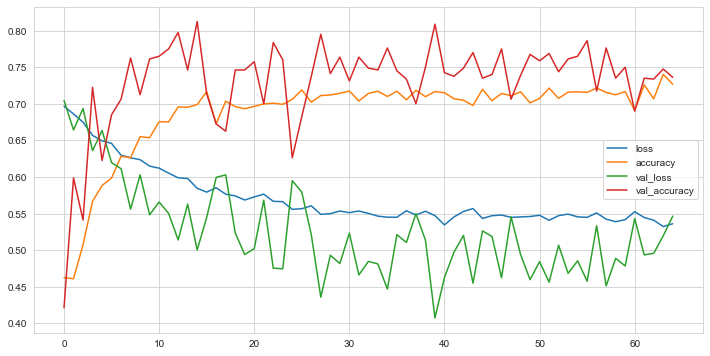

In [388]:
loss_df.plot();

In [389]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  76462.21875
accuracy :  0.2084999978542328


In [390]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  27 1580]
 [   3  390]]
              precision    recall  f1-score   support

           0       0.90      0.02      0.03      1607
           1       0.20      0.99      0.33       393

    accuracy                           0.21      2000
   macro avg       0.55      0.50      0.18      2000
weighted avg       0.76      0.21      0.09      2000



## GridSearchCV

In [183]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [428]:
def build_classifier(optimizer):
    classifier = Sequential()

    classifier.add(Dense(40, activation = "relu"))
    classifier.add(Dropout(0.5))
    classifier.add(Dense(20, activation = "relu"))
    classifier.add(Dropout(0.5))
    classifier.add(Dense(10, activation = "relu"))
    classifier.add(Dropout(0.5))
    classifier.add(Dense(1, activation = "sigmoid"))

    classifier.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier

In [429]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 25)

#### Evaluate

In [430]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          verbose = 1)

grid_model.fit(X_train_scaled, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Epoch 1/200
225/225 [==============================] - 0s 530us/step - loss: 0.7049 - accuracy: 0.5689
Epoch 2/200
225/225 [==============================] - 0s 534us/step - loss: 0.6912 - accuracy: 0.4828
Epoch 3/200
225/225 [==============================] - 0s 570us/step - loss: 0.6859 - accuracy: 0.5179
Epoch 4/200
225/225 [==============================] - 0s 534us/step - loss: 0.6780 - accuracy: 0.5243
Epoch 5/200
225/225 [==============================] - 0s 530us/step - loss: 0.6770 - accuracy: 0.5199
Epoch 6/200
225/225 [==============================] - 0s 534us/step - loss: 0.6661 - accuracy: 0.5412
Epoch 7/200
225/225 [==============================] - 0s 530us/step - loss: 0.6594 - accuracy: 0.5760
Epoch 8/200
225/225 [==============================] - 0s 534us/step - loss: 0.6582 - accuracy: 0.6015
Epoch 9/200
225/225 [==============================] - 0s 525us/step - loss: 0.6451 - accuracy: 0.6179
Epoch 10/2

225/225 [==============================] - 0s 516us/step - loss: 0.5149 - accuracy: 0.7440
Epoch 80/200
225/225 [==============================] - 0s 516us/step - loss: 0.5332 - accuracy: 0.7422
Epoch 81/200
225/225 [==============================] - 0s 521us/step - loss: 0.5273 - accuracy: 0.7418
Epoch 82/200
225/225 [==============================] - 0s 521us/step - loss: 0.5213 - accuracy: 0.7546
Epoch 83/200
225/225 [==============================] - 0s 530us/step - loss: 0.5263 - accuracy: 0.7471
Epoch 84/200
225/225 [==============================] - 0s 525us/step - loss: 0.5267 - accuracy: 0.7461
Epoch 85/200
225/225 [==============================] - 0s 548us/step - loss: 0.5184 - accuracy: 0.7450
Epoch 86/200
225/225 [==============================] - 0s 521us/step - loss: 0.5049 - accuracy: 0.7540
Epoch 87/200
225/225 [==============================] - 0s 534us/step - loss: 0.5206 - accuracy: 0.7399
Epoch 88/200
225/225 [==============================] - 0s 614us/step - loss:

225/225 [==============================] - 0s 766us/step - loss: 0.5298 - accuracy: 0.7708
Epoch 51/200
225/225 [==============================] - 0s 677us/step - loss: 0.5330 - accuracy: 0.7607
Epoch 52/200
225/225 [==============================] - 0s 623us/step - loss: 0.5257 - accuracy: 0.7686
Epoch 53/200
225/225 [==============================] - 0s 614us/step - loss: 0.5330 - accuracy: 0.7651
Epoch 54/200
225/225 [==============================] - 0s 574us/step - loss: 0.5283 - accuracy: 0.7729
Epoch 55/200
225/225 [==============================] - 0s 703us/step - loss: 0.5292 - accuracy: 0.7625
Epoch 56/200
225/225 [==============================] - 0s 766us/step - loss: 0.5302 - accuracy: 0.7646
Epoch 57/200
225/225 [==============================] - 0s 690us/step - loss: 0.5332 - accuracy: 0.7553
Epoch 58/200
225/225 [==============================] - 0s 806us/step - loss: 0.5360 - accuracy: 0.7617
Epoch 59/200
225/225 [==============================] - 0s 712us/step - loss:

225/225 [==============================] - 0s 815us/step - loss: 0.5187 - accuracy: 0.7742
Epoch 64/200
225/225 [==============================] - 0s 739us/step - loss: 0.5080 - accuracy: 0.7774
Epoch 65/200
225/225 [==============================] - 0s 734us/step - loss: 0.5213 - accuracy: 0.7732
Epoch 66/200
225/225 [==============================] - 0s 819us/step - loss: 0.5265 - accuracy: 0.7696
Epoch 67/200
225/225 [==============================] - 0s 677us/step - loss: 0.5192 - accuracy: 0.7703
Epoch 68/200
225/225 [==============================] - 0s 712us/step - loss: 0.5095 - accuracy: 0.7872
Epoch 69/200
225/225 [==============================] - 0s 668us/step - loss: 0.5162 - accuracy: 0.7717
Epoch 70/200
225/225 [==============================] - 0s 792us/step - loss: 0.5160 - accuracy: 0.7765
Epoch 71/200
225/225 [==============================] - 0s 671us/step - loss: 0.5191 - accuracy: 0.7685
Epoch 72/200
225/225 [==============================] - 0s 769us/step - loss:

225/225 [==============================] - 0s 512us/step - loss: 0.5423 - accuracy: 0.7631
Epoch 38/200
225/225 [==============================] - 0s 512us/step - loss: 0.5387 - accuracy: 0.7708
Epoch 39/200
225/225 [==============================] - 0s 512us/step - loss: 0.5301 - accuracy: 0.7769
Epoch 40/200
225/225 [==============================] - 0s 512us/step - loss: 0.5369 - accuracy: 0.7621
Epoch 41/200
225/225 [==============================] - 0s 512us/step - loss: 0.5322 - accuracy: 0.7625
Epoch 42/200
225/225 [==============================] - 0s 515us/step - loss: 0.5352 - accuracy: 0.7672
Epoch 43/200
225/225 [==============================] - 0s 515us/step - loss: 0.5200 - accuracy: 0.7592
Epoch 44/200
225/225 [==============================] - 0s 515us/step - loss: 0.5266 - accuracy: 0.7646
Epoch 45/200
225/225 [==============================] - 0s 532us/step - loss: 0.5345 - accuracy: 0.7588
Epoch 46/200
225/225 [==============================] - 0s 511us/step - loss:

225/225 [==============================] - 0s 525us/step - loss: 0.5372 - accuracy: 0.7693
Epoch 41/200
225/225 [==============================] - 0s 521us/step - loss: 0.5373 - accuracy: 0.7622
Epoch 42/200
225/225 [==============================] - 0s 521us/step - loss: 0.5295 - accuracy: 0.7611
Epoch 43/200
225/225 [==============================] - 0s 516us/step - loss: 0.5246 - accuracy: 0.7647
Epoch 44/200
225/225 [==============================] - 0s 515us/step - loss: 0.5295 - accuracy: 0.7622
Epoch 45/200
225/225 [==============================] - 0s 512us/step - loss: 0.5241 - accuracy: 0.7651
Epoch 46/200
225/225 [==============================] - 0s 521us/step - loss: 0.5254 - accuracy: 0.7661
Epoch 47/200
225/225 [==============================] - 0s 532us/step - loss: 0.5227 - accuracy: 0.7621
Epoch 48/200
225/225 [==============================] - 0s 512us/step - loss: 0.5186 - accuracy: 0.7708
Epoch 49/200
225/225 [==============================] - 0s 516us/step - loss:

225/225 [==============================] - 0s 516us/step - loss: 0.5350 - accuracy: 0.7547
Epoch 38/200
225/225 [==============================] - 0s 516us/step - loss: 0.5353 - accuracy: 0.7583
Epoch 39/200
225/225 [==============================] - 0s 510us/step - loss: 0.5347 - accuracy: 0.7500
Epoch 40/200
225/225 [==============================] - 0s 512us/step - loss: 0.5410 - accuracy: 0.7464
Epoch 41/200
225/225 [==============================] - 0s 516us/step - loss: 0.5381 - accuracy: 0.7536
Epoch 42/200
225/225 [==============================] - 0s 512us/step - loss: 0.5395 - accuracy: 0.7439
Epoch 43/200
225/225 [==============================] - 0s 539us/step - loss: 0.5329 - accuracy: 0.7590
Epoch 44/200
225/225 [==============================] - 0s 516us/step - loss: 0.5356 - accuracy: 0.7626
Epoch 45/200
225/225 [==============================] - 0s 516us/step - loss: 0.5325 - accuracy: 0.7640
Epoch 46/200
225/225 [==============================] - 0s 512us/step - loss:

225/225 [==============================] - 0s 529us/step - loss: 0.5151 - accuracy: 0.7628
Epoch 116/200
225/225 [==============================] - 0s 516us/step - loss: 0.5101 - accuracy: 0.7632
Epoch 117/200
225/225 [==============================] - 0s 513us/step - loss: 0.5267 - accuracy: 0.7607
Epoch 118/200
225/225 [==============================] - 0s 515us/step - loss: 0.5133 - accuracy: 0.7614
Epoch 119/200
225/225 [==============================] - 0s 516us/step - loss: 0.5220 - accuracy: 0.7604
Epoch 120/200
225/225 [==============================] - 0s 516us/step - loss: 0.5098 - accuracy: 0.7650
Epoch 121/200
225/225 [==============================] - 0s 516us/step - loss: 0.5215 - accuracy: 0.7613
Epoch 122/200
225/225 [==============================] - 0s 516us/step - loss: 0.5185 - accuracy: 0.7693
Epoch 123/200
225/225 [==============================] - 0s 539us/step - loss: 0.5125 - accuracy: 0.7700
Epoch 124/200
225/225 [==============================] - 0s 512us/ste

225/225 [==============================] - 0s 641us/step - loss: 0.5094 - accuracy: 0.7646
Epoch 67/200
225/225 [==============================] - 0s 726us/step - loss: 0.5237 - accuracy: 0.7601
Epoch 68/200
225/225 [==============================] - 0s 663us/step - loss: 0.5182 - accuracy: 0.7582
Epoch 69/200
225/225 [==============================] - 0s 742us/step - loss: 0.5189 - accuracy: 0.7629
Epoch 70/200
225/225 [==============================] - 0s 663us/step - loss: 0.5246 - accuracy: 0.7556
Epoch 00070: early stopping
Epoch 1/200
225/225 [==============================] - 0s 597us/step - loss: 0.6944 - accuracy: 0.5450
Epoch 2/200
225/225 [==============================] - 0s 521us/step - loss: 0.6772 - accuracy: 0.6381
Epoch 3/200
225/225 [==============================] - 0s 512us/step - loss: 0.6729 - accuracy: 0.6696
Epoch 4/200
225/225 [==============================] - 0s 516us/step - loss: 0.6630 - accuracy: 0.6683
Epoch 5/200
225/225 [==============================] 

225/225 [==============================] - 0s 530us/step - loss: 0.5764 - accuracy: 0.7506
Epoch 17/200
225/225 [==============================] - 0s 525us/step - loss: 0.5696 - accuracy: 0.7543
Epoch 18/200
225/225 [==============================] - 0s 552us/step - loss: 0.5695 - accuracy: 0.7576
Epoch 19/200
225/225 [==============================] - 0s 530us/step - loss: 0.5585 - accuracy: 0.7576
Epoch 20/200
225/225 [==============================] - 0s 521us/step - loss: 0.5531 - accuracy: 0.7643
Epoch 21/200
225/225 [==============================] - 0s 530us/step - loss: 0.5541 - accuracy: 0.7613
Epoch 22/200
225/225 [==============================] - 0s 521us/step - loss: 0.5537 - accuracy: 0.7635
Epoch 23/200
225/225 [==============================] - 0s 534us/step - loss: 0.5497 - accuracy: 0.7585
Epoch 24/200
225/225 [==============================] - 0s 539us/step - loss: 0.5518 - accuracy: 0.7753
Epoch 25/200
225/225 [==============================] - 0s 516us/step - loss:

225/225 [==============================] - 0s 552us/step - loss: 0.5254 - accuracy: 0.7764
Epoch 95/200
225/225 [==============================] - 0s 516us/step - loss: 0.5079 - accuracy: 0.7878
Epoch 96/200
225/225 [==============================] - 0s 516us/step - loss: 0.5083 - accuracy: 0.7833
Epoch 97/200
225/225 [==============================] - 0s 530us/step - loss: 0.5076 - accuracy: 0.7801
Epoch 98/200
225/225 [==============================] - 0s 565us/step - loss: 0.5064 - accuracy: 0.7878
Epoch 99/200
225/225 [==============================] - 0s 530us/step - loss: 0.5132 - accuracy: 0.7769
Epoch 100/200
225/225 [==============================] - 0s 521us/step - loss: 0.5118 - accuracy: 0.7785
Epoch 101/200
225/225 [==============================] - 0s 548us/step - loss: 0.5139 - accuracy: 0.7797
Epoch 102/200
225/225 [==============================] - 0s 565us/step - loss: 0.5075 - accuracy: 0.7862
Epoch 103/200
225/225 [==============================] - 0s 583us/step - l

225/225 [==============================] - 0s 543us/step - loss: 0.6206 - accuracy: 0.6490
Epoch 18/200
225/225 [==============================] - 0s 525us/step - loss: 0.6192 - accuracy: 0.6654
Epoch 19/200
225/225 [==============================] - 0s 530us/step - loss: 0.6183 - accuracy: 0.6553
Epoch 20/200
225/225 [==============================] - 0s 548us/step - loss: 0.6187 - accuracy: 0.6606
Epoch 21/200
225/225 [==============================] - 0s 539us/step - loss: 0.6130 - accuracy: 0.6843
Epoch 22/200
225/225 [==============================] - 0s 557us/step - loss: 0.6076 - accuracy: 0.6837
Epoch 23/200
225/225 [==============================] - 0s 530us/step - loss: 0.6038 - accuracy: 0.6742
Epoch 24/200
225/225 [==============================] - 0s 534us/step - loss: 0.5970 - accuracy: 0.6965
Epoch 25/200
225/225 [==============================] - 0s 534us/step - loss: 0.5914 - accuracy: 0.7019
Epoch 26/200
225/225 [==============================] - 0s 539us/step - loss:

225/225 [==============================] - 0s 539us/step - loss: 0.5260 - accuracy: 0.7389
Epoch 96/200
225/225 [==============================] - 0s 548us/step - loss: 0.5253 - accuracy: 0.7358
Epoch 00096: early stopping
Epoch 1/200
225/225 [==============================] - 0s 516us/step - loss: 0.6999 - accuracy: 0.6122
Epoch 2/200
225/225 [==============================] - 0s 512us/step - loss: 0.6908 - accuracy: 0.5707
Epoch 3/200
225/225 [==============================] - 0s 525us/step - loss: 0.6845 - accuracy: 0.5281
Epoch 4/200
225/225 [==============================] - 0s 521us/step - loss: 0.6780 - accuracy: 0.5467
Epoch 5/200
225/225 [==============================] - 0s 550us/step - loss: 0.6682 - accuracy: 0.5528
Epoch 6/200
225/225 [==============================] - 0s 525us/step - loss: 0.6643 - accuracy: 0.5886
Epoch 7/200
225/225 [==============================] - 0s 525us/step - loss: 0.6587 - accuracy: 0.5956
Epoch 8/200
225/225 [==============================] - 0

225/225 [==============================] - 0s 521us/step - loss: 0.5608 - accuracy: 0.8062
Epoch 78/200
225/225 [==============================] - 0s 512us/step - loss: 0.5610 - accuracy: 0.8040
Epoch 79/200
225/225 [==============================] - 0s 516us/step - loss: 0.5572 - accuracy: 0.7936
Epoch 80/200
225/225 [==============================] - 0s 503us/step - loss: 0.5620 - accuracy: 0.7774
Epoch 81/200
225/225 [==============================] - 0s 516us/step - loss: 0.5610 - accuracy: 0.7824
Epoch 82/200
225/225 [==============================] - 0s 499us/step - loss: 0.5744 - accuracy: 0.7928
Epoch 83/200
225/225 [==============================] - 0s 508us/step - loss: 0.5672 - accuracy: 0.8042
Epoch 84/200
225/225 [==============================] - 0s 503us/step - loss: 0.5711 - accuracy: 0.7982
Epoch 85/200
225/225 [==============================] - 0s 512us/step - loss: 0.5555 - accuracy: 0.8071
Epoch 86/200
225/225 [==============================] - 0s 503us/step - loss:

225/225 [==============================] - 0s 499us/step - loss: 0.6029 - accuracy: 0.6642
Epoch 37/200
225/225 [==============================] - 0s 490us/step - loss: 0.6050 - accuracy: 0.6590
Epoch 38/200
225/225 [==============================] - 0s 499us/step - loss: 0.5998 - accuracy: 0.6796
Epoch 39/200
225/225 [==============================] - 0s 494us/step - loss: 0.6039 - accuracy: 0.6637
Epoch 40/200
225/225 [==============================] - 0s 490us/step - loss: 0.5951 - accuracy: 0.6704
Epoch 41/200
225/225 [==============================] - 0s 490us/step - loss: 0.5977 - accuracy: 0.6729
Epoch 42/200
225/225 [==============================] - 0s 490us/step - loss: 0.6019 - accuracy: 0.6712
Epoch 43/200
225/225 [==============================] - 0s 494us/step - loss: 0.6029 - accuracy: 0.6790
Epoch 44/200
225/225 [==============================] - 0s 494us/step - loss: 0.6050 - accuracy: 0.6940
Epoch 45/200
225/225 [==============================] - 0s 512us/step - loss:

225/225 [==============================] - 0s 490us/step - loss: 0.5918 - accuracy: 0.6976
Epoch 115/200
225/225 [==============================] - 0s 490us/step - loss: 0.5902 - accuracy: 0.7085
Epoch 116/200
225/225 [==============================] - 0s 490us/step - loss: 0.5990 - accuracy: 0.6922
Epoch 117/200
225/225 [==============================] - 0s 494us/step - loss: 0.5862 - accuracy: 0.7142
Epoch 118/200
225/225 [==============================] - 0s 503us/step - loss: 0.5966 - accuracy: 0.7160
Epoch 119/200
225/225 [==============================] - 0s 543us/step - loss: 0.5965 - accuracy: 0.7010
Epoch 120/200
225/225 [==============================] - 0s 579us/step - loss: 0.5983 - accuracy: 0.7032
Epoch 121/200
225/225 [==============================] - 0s 570us/step - loss: 0.5979 - accuracy: 0.6811
Epoch 122/200
225/225 [==============================] - 0s 490us/step - loss: 0.5880 - accuracy: 0.7092
Epoch 123/200
225/225 [==============================] - 0s 490us/ste

225/225 [==============================] - 0s 494us/step - loss: 0.5933 - accuracy: 0.6650
Epoch 41/200
225/225 [==============================] - 0s 494us/step - loss: 0.5905 - accuracy: 0.6668
Epoch 42/200
225/225 [==============================] - 0s 516us/step - loss: 0.5927 - accuracy: 0.6683
Epoch 43/200
225/225 [==============================] - 0s 619us/step - loss: 0.5903 - accuracy: 0.6553
Epoch 44/200
225/225 [==============================] - 0s 583us/step - loss: 0.5981 - accuracy: 0.6639
Epoch 45/200
225/225 [==============================] - 0s 516us/step - loss: 0.5969 - accuracy: 0.6587
Epoch 46/200
225/225 [==============================] - 0s 494us/step - loss: 0.5852 - accuracy: 0.6733
Epoch 47/200
225/225 [==============================] - 0s 490us/step - loss: 0.5858 - accuracy: 0.6872
Epoch 48/200
225/225 [==============================] - 0s 494us/step - loss: 0.5855 - accuracy: 0.6797
Epoch 49/200
225/225 [==============================] - 0s 494us/step - loss:

225/225 [==============================] - 0s 490us/step - loss: 0.6120 - accuracy: 0.6592
Epoch 29/200
225/225 [==============================] - 0s 490us/step - loss: 0.5979 - accuracy: 0.6762
Epoch 30/200
225/225 [==============================] - 0s 494us/step - loss: 0.5993 - accuracy: 0.6714
Epoch 31/200
225/225 [==============================] - 0s 508us/step - loss: 0.6036 - accuracy: 0.6729
Epoch 32/200
225/225 [==============================] - 0s 503us/step - loss: 0.6008 - accuracy: 0.6764
Epoch 33/200
225/225 [==============================] - 0s 494us/step - loss: 0.6052 - accuracy: 0.6683
Epoch 34/200
225/225 [==============================] - 0s 494us/step - loss: 0.5988 - accuracy: 0.6733
Epoch 35/200
225/225 [==============================] - 0s 494us/step - loss: 0.6050 - accuracy: 0.6747
Epoch 36/200
225/225 [==============================] - 0s 494us/step - loss: 0.6017 - accuracy: 0.6721
Epoch 37/200
225/225 [==============================] - 0s 494us/step - loss:

225/225 [==============================] - 0s 597us/step - loss: 0.6043 - accuracy: 0.6824
Epoch 24/200
225/225 [==============================] - 0s 543us/step - loss: 0.6087 - accuracy: 0.6772
Epoch 25/200
225/225 [==============================] - 0s 561us/step - loss: 0.6095 - accuracy: 0.6774
Epoch 26/200
225/225 [==============================] - 0s 539us/step - loss: 0.6068 - accuracy: 0.6674
Epoch 27/200
225/225 [==============================] - 0s 606us/step - loss: 0.5971 - accuracy: 0.6701
Epoch 28/200
225/225 [==============================] - 0s 561us/step - loss: 0.5998 - accuracy: 0.6956
Epoch 29/200
225/225 [==============================] - 0s 574us/step - loss: 0.5875 - accuracy: 0.7035
Epoch 30/200
225/225 [==============================] - 0s 539us/step - loss: 0.5947 - accuracy: 0.7051
Epoch 31/200
225/225 [==============================] - 0s 557us/step - loss: 0.5962 - accuracy: 0.7047
Epoch 32/200
225/225 [==============================] - 0s 534us/step - loss:

225/225 [==============================] - 0s 503us/step - loss: 0.5615 - accuracy: 0.8096
Epoch 101/200
225/225 [==============================] - 0s 499us/step - loss: 0.5595 - accuracy: 0.8119
Epoch 102/200
225/225 [==============================] - 0s 508us/step - loss: 0.5560 - accuracy: 0.8090
Epoch 103/200
225/225 [==============================] - 0s 508us/step - loss: 0.5594 - accuracy: 0.8144
Epoch 104/200
225/225 [==============================] - 0s 494us/step - loss: 0.5515 - accuracy: 0.8206
Epoch 105/200
225/225 [==============================] - 0s 494us/step - loss: 0.5472 - accuracy: 0.8171
Epoch 106/200
225/225 [==============================] - 0s 503us/step - loss: 0.5681 - accuracy: 0.8118
Epoch 107/200
225/225 [==============================] - 0s 494us/step - loss: 0.5477 - accuracy: 0.8142
Epoch 108/200
225/225 [==============================] - 0s 494us/step - loss: 0.5613 - accuracy: 0.8056
Epoch 109/200
225/225 [==============================] - 0s 494us/ste

225/225 [==============================] - 0s 490us/step - loss: 0.6033 - accuracy: 0.6507
Epoch 57/200
225/225 [==============================] - 0s 490us/step - loss: 0.6041 - accuracy: 0.6415
Epoch 58/200
225/225 [==============================] - 0s 503us/step - loss: 0.6125 - accuracy: 0.6494
Epoch 59/200
225/225 [==============================] - 0s 503us/step - loss: 0.6141 - accuracy: 0.6361
Epoch 60/200
225/225 [==============================] - 0s 490us/step - loss: 0.6073 - accuracy: 0.6406
Epoch 61/200
225/225 [==============================] - 0s 490us/step - loss: 0.6034 - accuracy: 0.6489
Epoch 62/200
225/225 [==============================] - 0s 490us/step - loss: 0.6036 - accuracy: 0.6599
Epoch 63/200
225/225 [==============================] - 0s 499us/step - loss: 0.6108 - accuracy: 0.6386
Epoch 64/200
225/225 [==============================] - 0s 490us/step - loss: 0.6033 - accuracy: 0.6382
Epoch 65/200
225/225 [==============================] - 0s 499us/step - loss:

225/225 [==============================] - 0s 490us/step - loss: 0.5923 - accuracy: 0.7715
Epoch 48/200
225/225 [==============================] - 0s 490us/step - loss: 0.5966 - accuracy: 0.7865
Epoch 49/200
225/225 [==============================] - 0s 490us/step - loss: 0.5964 - accuracy: 0.7832
Epoch 50/200
225/225 [==============================] - 0s 485us/step - loss: 0.5899 - accuracy: 0.7792
Epoch 51/200
225/225 [==============================] - 0s 499us/step - loss: 0.5972 - accuracy: 0.7844
Epoch 52/200
225/225 [==============================] - 0s 499us/step - loss: 0.5873 - accuracy: 0.7774
Epoch 53/200
225/225 [==============================] - 0s 490us/step - loss: 0.5954 - accuracy: 0.7797
Epoch 54/200
225/225 [==============================] - 0s 490us/step - loss: 0.5859 - accuracy: 0.7792
Epoch 55/200
225/225 [==============================] - 0s 490us/step - loss: 0.5955 - accuracy: 0.7688
Epoch 56/200
225/225 [==============================] - 0s 490us/step - loss:

225/225 [==============================] - 0s 490us/step - loss: 0.6647 - accuracy: 0.6043
Epoch 6/200
225/225 [==============================] - 0s 499us/step - loss: 0.6575 - accuracy: 0.5785
Epoch 7/200
225/225 [==============================] - 0s 494us/step - loss: 0.6561 - accuracy: 0.5999
Epoch 8/200
225/225 [==============================] - 0s 521us/step - loss: 0.6499 - accuracy: 0.5986
Epoch 9/200
225/225 [==============================] - 0s 525us/step - loss: 0.6511 - accuracy: 0.6094
Epoch 10/200
225/225 [==============================] - 0s 508us/step - loss: 0.6332 - accuracy: 0.6258
Epoch 11/200
225/225 [==============================] - 0s 561us/step - loss: 0.6379 - accuracy: 0.6371
Epoch 12/200
225/225 [==============================] - 0s 521us/step - loss: 0.6358 - accuracy: 0.6456
Epoch 13/200
225/225 [==============================] - 0s 499us/step - loss: 0.6252 - accuracy: 0.6425
Epoch 14/200
225/225 [==============================] - 0s 499us/step - loss: 0.6

Epoch 84/200
225/225 [==============================] - 0s 512us/step - loss: 0.5592 - accuracy: 0.7494
Epoch 85/200
225/225 [==============================] - 0s 508us/step - loss: 0.5542 - accuracy: 0.7489
Epoch 86/200
225/225 [==============================] - 0s 499us/step - loss: 0.5575 - accuracy: 0.7369
Epoch 87/200
225/225 [==============================] - 0s 499us/step - loss: 0.5575 - accuracy: 0.7311
Epoch 88/200
225/225 [==============================] - 0s 623us/step - loss: 0.5524 - accuracy: 0.7482
Epoch 89/200
225/225 [==============================] - 0s 619us/step - loss: 0.5480 - accuracy: 0.7424
Epoch 90/200
225/225 [==============================] - 0s 588us/step - loss: 0.5626 - accuracy: 0.7249
Epoch 91/200
225/225 [==============================] - 0s 588us/step - loss: 0.5637 - accuracy: 0.7422
Epoch 92/200
225/225 [==============================] - 0s 703us/step - loss: 0.5509 - accuracy: 0.73870s - loss: 0.5413 - accuracy: 
Epoch 93/200
225/225 [============

225/225 [==============================] - 0s 588us/step - loss: 0.6696 - accuracy: 0.6072
Epoch 5/200
225/225 [==============================] - 0s 570us/step - loss: 0.6647 - accuracy: 0.6046
Epoch 6/200
225/225 [==============================] - 0s 534us/step - loss: 0.6520 - accuracy: 0.6214
Epoch 7/200
225/225 [==============================] - 0s 513us/step - loss: 0.6538 - accuracy: 0.6212
Epoch 8/200
225/225 [==============================] - 0s 539us/step - loss: 0.6514 - accuracy: 0.6219
Epoch 9/200
225/225 [==============================] - 0s 606us/step - loss: 0.6460 - accuracy: 0.6389
Epoch 10/200
225/225 [==============================] - 0s 557us/step - loss: 0.6403 - accuracy: 0.6442
Epoch 11/200
225/225 [==============================] - 0s 530us/step - loss: 0.6435 - accuracy: 0.6492
Epoch 12/200
225/225 [==============================] - 0s 503us/step - loss: 0.6314 - accuracy: 0.6607
Epoch 13/200
225/225 [==============================] - 0s 503us/step - loss: 0.62

225/225 [==============================] - 0s 499us/step - loss: 0.5717 - accuracy: 0.7931
Epoch 83/200
225/225 [==============================] - 0s 499us/step - loss: 0.5614 - accuracy: 0.7957
Epoch 84/200
225/225 [==============================] - 0s 494us/step - loss: 0.5602 - accuracy: 0.7911
Epoch 85/200
225/225 [==============================] - 0s 512us/step - loss: 0.5602 - accuracy: 0.7824
Epoch 86/200
225/225 [==============================] - 0s 503us/step - loss: 0.5607 - accuracy: 0.7933
Epoch 87/200
225/225 [==============================] - 0s 512us/step - loss: 0.5544 - accuracy: 0.7960
Epoch 88/200
225/225 [==============================] - 0s 503us/step - loss: 0.5694 - accuracy: 0.7969
Epoch 89/200
225/225 [==============================] - 0s 508us/step - loss: 0.5523 - accuracy: 0.7943
Epoch 90/200
225/225 [==============================] - 0s 499us/step - loss: 0.5582 - accuracy: 0.7906
Epoch 91/200
225/225 [==============================] - 0s 499us/step - loss:

225/225 [==============================] - 0s 494us/step - loss: 0.6333 - accuracy: 0.7467
Epoch 14/200
225/225 [==============================] - 0s 494us/step - loss: 0.6292 - accuracy: 0.7596
Epoch 15/200
225/225 [==============================] - 0s 494us/step - loss: 0.6351 - accuracy: 0.7561
Epoch 16/200
225/225 [==============================] - 0s 499us/step - loss: 0.6272 - accuracy: 0.7557
Epoch 17/200
225/225 [==============================] - 0s 512us/step - loss: 0.6223 - accuracy: 0.7583
Epoch 18/200
225/225 [==============================] - 0s 508us/step - loss: 0.6192 - accuracy: 0.7675
Epoch 19/200
225/225 [==============================] - 0s 508us/step - loss: 0.6146 - accuracy: 0.7618
Epoch 20/200
225/225 [==============================] - 0s 499us/step - loss: 0.6140 - accuracy: 0.7674
Epoch 21/200
225/225 [==============================] - 0s 512us/step - loss: 0.6031 - accuracy: 0.7658
Epoch 22/200
225/225 [==============================] - 0s 521us/step - loss:

225/225 [==============================] - 0s 472us/step - loss: 0.6901 - accuracy: 0.4238
Epoch 8/200
225/225 [==============================] - 0s 468us/step - loss: 0.6869 - accuracy: 0.4201
Epoch 9/200
225/225 [==============================] - 0s 476us/step - loss: 0.6868 - accuracy: 0.4344
Epoch 10/200
225/225 [==============================] - 0s 472us/step - loss: 0.6841 - accuracy: 0.4481
Epoch 11/200
225/225 [==============================] - 0s 476us/step - loss: 0.6856 - accuracy: 0.4465
Epoch 12/200
225/225 [==============================] - 0s 481us/step - loss: 0.6795 - accuracy: 0.4646
Epoch 13/200
225/225 [==============================] - 0s 494us/step - loss: 0.6822 - accuracy: 0.4681
Epoch 14/200
225/225 [==============================] - 0s 485us/step - loss: 0.6831 - accuracy: 0.4543
Epoch 15/200
225/225 [==============================] - 0s 472us/step - loss: 0.6777 - accuracy: 0.4764
Epoch 16/200
225/225 [==============================] - 0s 472us/step - loss: 0

225/225 [==============================] - 0s 467us/step - loss: 0.6192 - accuracy: 0.6590
Epoch 86/200
225/225 [==============================] - 0s 468us/step - loss: 0.6164 - accuracy: 0.6515
Epoch 87/200
225/225 [==============================] - 0s 481us/step - loss: 0.6155 - accuracy: 0.6601
Epoch 88/200
225/225 [==============================] - 0s 494us/step - loss: 0.6103 - accuracy: 0.6685
Epoch 89/200
225/225 [==============================] - 0s 481us/step - loss: 0.6157 - accuracy: 0.6590
Epoch 90/200
225/225 [==============================] - 0s 472us/step - loss: 0.6136 - accuracy: 0.6668
Epoch 91/200
225/225 [==============================] - 0s 472us/step - loss: 0.6040 - accuracy: 0.6686
Epoch 92/200
225/225 [==============================] - 0s 472us/step - loss: 0.6180 - accuracy: 0.6596
Epoch 93/200
225/225 [==============================] - 0s 485us/step - loss: 0.6135 - accuracy: 0.6628
Epoch 94/200
225/225 [==============================] - 0s 494us/step - loss:

225/225 [==============================] - 0s 472us/step - loss: 0.6820 - accuracy: 0.6018
Epoch 10/200
225/225 [==============================] - 0s 476us/step - loss: 0.6821 - accuracy: 0.6186
Epoch 11/200
225/225 [==============================] - 0s 472us/step - loss: 0.6817 - accuracy: 0.6235
Epoch 12/200
225/225 [==============================] - 0s 472us/step - loss: 0.6824 - accuracy: 0.6249
Epoch 13/200
225/225 [==============================] - 0s 472us/step - loss: 0.6815 - accuracy: 0.6314
Epoch 14/200
225/225 [==============================] - 0s 472us/step - loss: 0.6818 - accuracy: 0.6340
Epoch 15/200
225/225 [==============================] - 0s 476us/step - loss: 0.6774 - accuracy: 0.6431
Epoch 16/200
225/225 [==============================] - 0s 485us/step - loss: 0.6783 - accuracy: 0.6408
Epoch 17/200
225/225 [==============================] - 0s 481us/step - loss: 0.6789 - accuracy: 0.6225
Epoch 18/200
225/225 [==============================] - 0s 481us/step - loss:

225/225 [==============================] - 0s 579us/step - loss: 0.6168 - accuracy: 0.6964
Epoch 88/200
225/225 [==============================] - 0s 574us/step - loss: 0.6041 - accuracy: 0.7025
Epoch 89/200
225/225 [==============================] - 0s 548us/step - loss: 0.6132 - accuracy: 0.6974
Epoch 90/200
225/225 [==============================] - 0s 534us/step - loss: 0.6079 - accuracy: 0.7026
Epoch 91/200
225/225 [==============================] - 0s 512us/step - loss: 0.6074 - accuracy: 0.6929
Epoch 92/200
225/225 [==============================] - 0s 490us/step - loss: 0.6050 - accuracy: 0.6983
Epoch 93/200
225/225 [==============================] - 0s 503us/step - loss: 0.6078 - accuracy: 0.7025
Epoch 94/200
225/225 [==============================] - 0s 485us/step - loss: 0.5936 - accuracy: 0.7085
Epoch 95/200
225/225 [==============================] - 0s 499us/step - loss: 0.6001 - accuracy: 0.7139
Epoch 96/200
225/225 [==============================] - 0s 476us/step - loss:

225/225 [==============================] - 0s 494us/step - loss: 0.5393 - accuracy: 0.7769
Epoch 165/200
225/225 [==============================] - 0s 490us/step - loss: 0.5462 - accuracy: 0.7640
Epoch 166/200
225/225 [==============================] - 0s 490us/step - loss: 0.5446 - accuracy: 0.7710
Epoch 167/200
225/225 [==============================] - 0s 476us/step - loss: 0.5450 - accuracy: 0.7635
Epoch 168/200
225/225 [==============================] - 0s 481us/step - loss: 0.5405 - accuracy: 0.7718
Epoch 169/200
225/225 [==============================] - 0s 498us/step - loss: 0.5480 - accuracy: 0.7736
Epoch 170/200
225/225 [==============================] - 0s 503us/step - loss: 0.5404 - accuracy: 0.7769
Epoch 171/200
225/225 [==============================] - 0s 481us/step - loss: 0.5345 - accuracy: 0.7718
Epoch 172/200
225/225 [==============================] - 0s 481us/step - loss: 0.5379 - accuracy: 0.7728
Epoch 173/200
225/225 [==============================] - 0s 494us/ste

225/225 [==============================] - 0s 490us/step - loss: 0.6860 - accuracy: 0.4672
Epoch 17/200
225/225 [==============================] - 0s 485us/step - loss: 0.6840 - accuracy: 0.4569
Epoch 18/200
225/225 [==============================] - 0s 498us/step - loss: 0.6857 - accuracy: 0.4497
Epoch 19/200
225/225 [==============================] - 0s 485us/step - loss: 0.6854 - accuracy: 0.4414
Epoch 20/200
225/225 [==============================] - 0s 485us/step - loss: 0.6841 - accuracy: 0.4508
Epoch 21/200
225/225 [==============================] - 0s 500us/step - loss: 0.6829 - accuracy: 0.4607
Epoch 22/200
225/225 [==============================] - 0s 485us/step - loss: 0.6821 - accuracy: 0.4592
Epoch 23/200
225/225 [==============================] - 0s 481us/step - loss: 0.6864 - accuracy: 0.4431
Epoch 24/200
225/225 [==============================] - 0s 481us/step - loss: 0.6824 - accuracy: 0.4561
Epoch 25/200
225/225 [==============================] - 0s 481us/step - loss:

225/225 [==============================] - 0s 476us/step - loss: 0.6547 - accuracy: 0.6315
Epoch 69/200
225/225 [==============================] - 0s 476us/step - loss: 0.6530 - accuracy: 0.6247
Epoch 70/200
225/225 [==============================] - 0s 494us/step - loss: 0.6524 - accuracy: 0.6122
Epoch 71/200
225/225 [==============================] - 0s 476us/step - loss: 0.6574 - accuracy: 0.6090
Epoch 72/200
225/225 [==============================] - 0s 481us/step - loss: 0.6512 - accuracy: 0.6444
Epoch 73/200
225/225 [==============================] - 0s 490us/step - loss: 0.6494 - accuracy: 0.6367
Epoch 74/200
225/225 [==============================] - 0s 494us/step - loss: 0.6475 - accuracy: 0.6581
Epoch 75/200
225/225 [==============================] - 0s 481us/step - loss: 0.6521 - accuracy: 0.6439
Epoch 76/200
225/225 [==============================] - 0s 481us/step - loss: 0.6482 - accuracy: 0.6650
Epoch 77/200
225/225 [==============================] - 0s 481us/step - loss:

225/225 [==============================] - 0s 481us/step - loss: 0.5804 - accuracy: 0.7240
Epoch 147/200
225/225 [==============================] - 0s 476us/step - loss: 0.5856 - accuracy: 0.7219
Epoch 148/200
225/225 [==============================] - 0s 476us/step - loss: 0.5825 - accuracy: 0.7408
Epoch 149/200
225/225 [==============================] - 0s 485us/step - loss: 0.5804 - accuracy: 0.7353
Epoch 150/200
225/225 [==============================] - 0s 483us/step - loss: 0.5883 - accuracy: 0.7237
Epoch 151/200
225/225 [==============================] - 0s 481us/step - loss: 0.5875 - accuracy: 0.7357
Epoch 152/200
225/225 [==============================] - 0s 476us/step - loss: 0.5770 - accuracy: 0.7394
Epoch 153/200
225/225 [==============================] - 0s 476us/step - loss: 0.5784 - accuracy: 0.7381
Epoch 154/200
225/225 [==============================] - 0s 480us/step - loss: 0.5773 - accuracy: 0.7354
Epoch 155/200
225/225 [==============================] - 0s 476us/ste

225/225 [==============================] - 0s 494us/step - loss: 0.6814 - accuracy: 0.5147
Epoch 25/200
225/225 [==============================] - 0s 499us/step - loss: 0.6736 - accuracy: 0.5210
Epoch 26/200
225/225 [==============================] - 0s 503us/step - loss: 0.6750 - accuracy: 0.5135
Epoch 27/200
225/225 [==============================] - 0s 499us/step - loss: 0.6699 - accuracy: 0.5229
Epoch 28/200
225/225 [==============================] - 0s 512us/step - loss: 0.6687 - accuracy: 0.5411
Epoch 29/200
225/225 [==============================] - 0s 516us/step - loss: 0.6737 - accuracy: 0.5239
Epoch 30/200
225/225 [==============================] - 0s 524us/step - loss: 0.6763 - accuracy: 0.5215
Epoch 31/200
225/225 [==============================] - 0s 503us/step - loss: 0.6720 - accuracy: 0.5136
Epoch 32/200
225/225 [==============================] - 0s 565us/step - loss: 0.6711 - accuracy: 0.5329
Epoch 33/200
225/225 [==============================] - 0s 543us/step - loss:

225/225 [==============================] - 0s 485us/step - loss: 0.6059 - accuracy: 0.6835
Epoch 103/200
225/225 [==============================] - 0s 476us/step - loss: 0.6180 - accuracy: 0.6643
Epoch 104/200
225/225 [==============================] - 0s 485us/step - loss: 0.6143 - accuracy: 0.6714
Epoch 105/200
225/225 [==============================] - 0s 499us/step - loss: 0.6100 - accuracy: 0.6765
Epoch 106/200
225/225 [==============================] - 0s 494us/step - loss: 0.6102 - accuracy: 0.6675
Epoch 107/200
225/225 [==============================] - 0s 499us/step - loss: 0.6123 - accuracy: 0.6707
Epoch 108/200
225/225 [==============================] - 0s 503us/step - loss: 0.6039 - accuracy: 0.6924
Epoch 109/200
225/225 [==============================] - 0s 490us/step - loss: 0.6036 - accuracy: 0.6797
Epoch 110/200
225/225 [==============================] - 0s 485us/step - loss: 0.6115 - accuracy: 0.6701
Epoch 111/200
225/225 [==============================] - 0s 476us/ste

225/225 [==============================] - 0s 752us/step - loss: 0.5606 - accuracy: 0.73120s - loss: 0.5531 - accuracy: 0.73
Epoch 180/200
225/225 [==============================] - 0s 668us/step - loss: 0.5604 - accuracy: 0.73100s - loss: 0.5614 - accuracy: 0.72
Epoch 181/200
225/225 [==============================] - 0s 694us/step - loss: 0.5687 - accuracy: 0.7240
Epoch 182/200
225/225 [==============================] - 0s 597us/step - loss: 0.5727 - accuracy: 0.7239
Epoch 183/200
225/225 [==============================] - 0s 735us/step - loss: 0.5669 - accuracy: 0.7274
Epoch 184/200
225/225 [==============================] - 0s 659us/step - loss: 0.5638 - accuracy: 0.7374
Epoch 185/200
225/225 [==============================] - 0s 815us/step - loss: 0.5603 - accuracy: 0.7414
Epoch 186/200
225/225 [==============================] - 0s 699us/step - loss: 0.5607 - accuracy: 0.7231
Epoch 187/200
225/225 [==============================] - 0s 623us/step - loss: 0.5679 - accuracy: 0.7221
E

225/225 [==============================] - 0s 600us/step - loss: 0.6424 - accuracy: 0.6781
Epoch 58/200
225/225 [==============================] - 0s 476us/step - loss: 0.6393 - accuracy: 0.6893
Epoch 59/200
225/225 [==============================] - 0s 477us/step - loss: 0.6394 - accuracy: 0.6735
Epoch 60/200
225/225 [==============================] - 0s 583us/step - loss: 0.6375 - accuracy: 0.6850
Epoch 61/200
225/225 [==============================] - 0s 619us/step - loss: 0.6388 - accuracy: 0.6774
Epoch 62/200
225/225 [==============================] - 0s 628us/step - loss: 0.6332 - accuracy: 0.6897
Epoch 63/200
225/225 [==============================] - 0s 672us/step - loss: 0.6362 - accuracy: 0.6856
Epoch 64/200
225/225 [==============================] - 0s 543us/step - loss: 0.6368 - accuracy: 0.6808
Epoch 65/200
225/225 [==============================] - 0s 530us/step - loss: 0.6328 - accuracy: 0.6926
Epoch 66/200
225/225 [==============================] - 0s 543us/step - loss:

225/225 [==============================] - 0s 499us/step - loss: 0.5778 - accuracy: 0.7658
Epoch 136/200
225/225 [==============================] - 0s 476us/step - loss: 0.5736 - accuracy: 0.7528
Epoch 137/200
225/225 [==============================] - 0s 494us/step - loss: 0.5658 - accuracy: 0.7676
Epoch 138/200
225/225 [==============================] - 0s 472us/step - loss: 0.5685 - accuracy: 0.7640
Epoch 139/200
225/225 [==============================] - 0s 490us/step - loss: 0.5586 - accuracy: 0.7707
Epoch 140/200
225/225 [==============================] - 0s 475us/step - loss: 0.5627 - accuracy: 0.7631
Epoch 141/200
225/225 [==============================] - 0s 481us/step - loss: 0.5684 - accuracy: 0.7690
Epoch 142/200
225/225 [==============================] - 0s 481us/step - loss: 0.5642 - accuracy: 0.7631
Epoch 143/200
225/225 [==============================] - 0s 494us/step - loss: 0.5602 - accuracy: 0.7658
Epoch 144/200
225/225 [==============================] - 0s 490us/ste

225/225 [==============================] - 0s 506us/step - loss: 0.6752 - accuracy: 0.6787
Epoch 14/200
225/225 [==============================] - 0s 494us/step - loss: 0.6734 - accuracy: 0.6774
Epoch 15/200
225/225 [==============================] - 0s 494us/step - loss: 0.6751 - accuracy: 0.6781
Epoch 16/200
225/225 [==============================] - 0s 494us/step - loss: 0.6719 - accuracy: 0.6818
Epoch 17/200
225/225 [==============================] - 0s 766us/step - loss: 0.6720 - accuracy: 0.6874
Epoch 18/200
225/225 [==============================] - 0s 557us/step - loss: 0.6702 - accuracy: 0.6914
Epoch 19/200
225/225 [==============================] - 0s 574us/step - loss: 0.6694 - accuracy: 0.6836
Epoch 20/200
225/225 [==============================] - 0s 592us/step - loss: 0.6681 - accuracy: 0.6914
Epoch 21/200
225/225 [==============================] - 0s 650us/step - loss: 0.6666 - accuracy: 0.6915
Epoch 22/200
225/225 [==============================] - 0s 650us/step - loss:

225/225 [==============================] - 0s 476us/step - loss: 0.6029 - accuracy: 0.7353
Epoch 92/200
225/225 [==============================] - 0s 490us/step - loss: 0.6020 - accuracy: 0.7376
Epoch 93/200
225/225 [==============================] - 0s 472us/step - loss: 0.5986 - accuracy: 0.7499
Epoch 94/200
225/225 [==============================] - 0s 476us/step - loss: 0.5999 - accuracy: 0.7369
Epoch 95/200
225/225 [==============================] - 0s 468us/step - loss: 0.5923 - accuracy: 0.7447
Epoch 96/200
225/225 [==============================] - 0s 494us/step - loss: 0.5949 - accuracy: 0.7433
Epoch 97/200
225/225 [==============================] - 0s 485us/step - loss: 0.5914 - accuracy: 0.7476
Epoch 98/200
225/225 [==============================] - 0s 485us/step - loss: 0.5965 - accuracy: 0.7401
Epoch 99/200
225/225 [==============================] - 0s 472us/step - loss: 0.5917 - accuracy: 0.7487
Epoch 100/200
225/225 [==============================] - 0s 472us/step - loss

225/225 [==============================] - 0s 490us/step - loss: 0.5471 - accuracy: 0.7883
Epoch 170/200
225/225 [==============================] - 0s 485us/step - loss: 0.5464 - accuracy: 0.7832
Epoch 171/200
225/225 [==============================] - 0s 485us/step - loss: 0.5485 - accuracy: 0.7803
Epoch 172/200
225/225 [==============================] - 0s 472us/step - loss: 0.5499 - accuracy: 0.7854
Epoch 173/200
225/225 [==============================] - 0s 490us/step - loss: 0.5433 - accuracy: 0.7800
Epoch 00173: early stopping
Epoch 1/200
225/225 [==============================] - 0s 472us/step - loss: 0.7068 - accuracy: 0.4329
Epoch 2/200
225/225 [==============================] - 0s 485us/step - loss: 0.6963 - accuracy: 0.5294
Epoch 3/200
225/225 [==============================] - 0s 490us/step - loss: 0.6928 - accuracy: 0.5750
Epoch 4/200
225/225 [==============================] - 0s 490us/step - loss: 0.6953 - accuracy: 0.5954
Epoch 5/200
225/225 [============================

225/225 [==============================] - 0s 485us/step - loss: 0.6232 - accuracy: 0.7519
Epoch 75/200
225/225 [==============================] - 0s 494us/step - loss: 0.6187 - accuracy: 0.7557
Epoch 76/200
225/225 [==============================] - 0s 472us/step - loss: 0.6252 - accuracy: 0.7490
Epoch 77/200
225/225 [==============================] - 0s 476us/step - loss: 0.6210 - accuracy: 0.7599
Epoch 78/200
225/225 [==============================] - 0s 503us/step - loss: 0.6226 - accuracy: 0.7619
Epoch 79/200
225/225 [==============================] - 0s 494us/step - loss: 0.6161 - accuracy: 0.7615
Epoch 80/200
225/225 [==============================] - 0s 476us/step - loss: 0.6122 - accuracy: 0.7633
Epoch 81/200
225/225 [==============================] - 0s 512us/step - loss: 0.6148 - accuracy: 0.7651
Epoch 82/200
225/225 [==============================] - 0s 485us/step - loss: 0.6146 - accuracy: 0.7603
Epoch 83/200
225/225 [==============================] - 0s 512us/step - loss:

225/225 [==============================] - 0s 485us/step - loss: 0.5588 - accuracy: 0.8025
Epoch 153/200
225/225 [==============================] - 0s 494us/step - loss: 0.5631 - accuracy: 0.8019
Epoch 154/200
225/225 [==============================] - 0s 490us/step - loss: 0.5626 - accuracy: 0.7983
Epoch 155/200
225/225 [==============================] - 0s 494us/step - loss: 0.5698 - accuracy: 0.7965
Epoch 156/200
225/225 [==============================] - 0s 490us/step - loss: 0.5655 - accuracy: 0.7981
Epoch 157/200
225/225 [==============================] - 0s 552us/step - loss: 0.5713 - accuracy: 0.7982
Epoch 158/200
225/225 [==============================] - 0s 485us/step - loss: 0.5660 - accuracy: 0.8006
Epoch 159/200
225/225 [==============================] - 0s 476us/step - loss: 0.5609 - accuracy: 0.8010
Epoch 160/200
225/225 [==============================] - 0s 597us/step - loss: 0.5657 - accuracy: 0.7953
Epoch 161/200
225/225 [==============================] - 0s 570us/ste

225/225 [==============================] - 0s 530us/step - loss: 0.6546 - accuracy: 0.6039
Epoch 55/200
225/225 [==============================] - 0s 530us/step - loss: 0.6452 - accuracy: 0.6299
Epoch 56/200
225/225 [==============================] - 0s 516us/step - loss: 0.6467 - accuracy: 0.6244
Epoch 57/200
225/225 [==============================] - 0s 516us/step - loss: 0.6462 - accuracy: 0.6344
Epoch 58/200
225/225 [==============================] - 0s 525us/step - loss: 0.6464 - accuracy: 0.6299
Epoch 59/200
225/225 [==============================] - 0s 499us/step - loss: 0.6435 - accuracy: 0.6249
Epoch 60/200
225/225 [==============================] - 0s 476us/step - loss: 0.6402 - accuracy: 0.6294
Epoch 61/200
225/225 [==============================] - 0s 494us/step - loss: 0.6345 - accuracy: 0.6479
Epoch 62/200
225/225 [==============================] - 0s 525us/step - loss: 0.6490 - accuracy: 0.6349
Epoch 63/200
225/225 [==============================] - 0s 574us/step - loss:

225/225 [==============================] - 0s 623us/step - loss: 0.5682 - accuracy: 0.7382
Epoch 133/200
225/225 [==============================] - 0s 614us/step - loss: 0.5699 - accuracy: 0.7489
Epoch 134/200
225/225 [==============================] - 0s 606us/step - loss: 0.5662 - accuracy: 0.7471
Epoch 135/200
225/225 [==============================] - 0s 583us/step - loss: 0.5631 - accuracy: 0.7476
Epoch 136/200
225/225 [==============================] - 0s 592us/step - loss: 0.5567 - accuracy: 0.7543
Epoch 137/200
225/225 [==============================] - 0s 552us/step - loss: 0.5660 - accuracy: 0.7510
Epoch 138/200
225/225 [==============================] - 0s 534us/step - loss: 0.5639 - accuracy: 0.7661
Epoch 139/200
225/225 [==============================] - 0s 516us/step - loss: 0.5658 - accuracy: 0.7525
Epoch 140/200
225/225 [==============================] - 0s 508us/step - loss: 0.5634 - accuracy: 0.7533
Epoch 141/200
225/225 [==============================] - 0s 592us/ste

225/225 [==============================] - 0s 481us/step - loss: 0.7003 - accuracy: 0.4310
Epoch 25/200
225/225 [==============================] - 0s 476us/step - loss: 0.7009 - accuracy: 0.4183
Epoch 26/200
225/225 [==============================] - 0s 481us/step - loss: 0.6994 - accuracy: 0.4324
Epoch 00026: early stopping
Epoch 1/200
225/225 [==============================] - 0s 485us/step - loss: 0.7436 - accuracy: 0.5154
Epoch 2/200
225/225 [==============================] - 0s 490us/step - loss: 0.7193 - accuracy: 0.5161
Epoch 3/200
225/225 [==============================] - 0s 472us/step - loss: 0.7248 - accuracy: 0.5111
Epoch 4/200
225/225 [==============================] - 0s 472us/step - loss: 0.7107 - accuracy: 0.5258
Epoch 5/200
225/225 [==============================] - 0s 472us/step - loss: 0.7170 - accuracy: 0.5118
Epoch 6/200
225/225 [==============================] - 0s 472us/step - loss: 0.7107 - accuracy: 0.5183
Epoch 7/200
225/225 [==============================] - 

225/225 [==============================] - 0s 476us/step - loss: 0.6924 - accuracy: 0.5819
Epoch 48/200
225/225 [==============================] - 0s 476us/step - loss: 0.6910 - accuracy: 0.5840
Epoch 49/200
225/225 [==============================] - 0s 481us/step - loss: 0.6922 - accuracy: 0.5797
Epoch 50/200
225/225 [==============================] - 0s 481us/step - loss: 0.6965 - accuracy: 0.5860
Epoch 51/200
225/225 [==============================] - 0s 481us/step - loss: 0.6944 - accuracy: 0.5833
Epoch 52/200
225/225 [==============================] - 0s 476us/step - loss: 0.6951 - accuracy: 0.5886
Epoch 53/200
225/225 [==============================] - 0s 490us/step - loss: 0.6936 - accuracy: 0.5843
Epoch 54/200
225/225 [==============================] - 0s 476us/step - loss: 0.6930 - accuracy: 0.5872
Epoch 55/200
225/225 [==============================] - 0s 490us/step - loss: 0.6927 - accuracy: 0.5931
Epoch 56/200
225/225 [==============================] - 0s 481us/step - loss:

225/225 [==============================] - 0s 481us/step - loss: 0.6856 - accuracy: 0.6101
Epoch 126/200
225/225 [==============================] - 0s 481us/step - loss: 0.6846 - accuracy: 0.6161
Epoch 127/200
225/225 [==============================] - 0s 481us/step - loss: 0.6873 - accuracy: 0.6056
Epoch 128/200
225/225 [==============================] - 0s 485us/step - loss: 0.6863 - accuracy: 0.6075
Epoch 129/200
225/225 [==============================] - 0s 481us/step - loss: 0.6866 - accuracy: 0.6124
Epoch 00129: early stopping
Epoch 1/200
225/225 [==============================] - 0s 485us/step - loss: 0.7210 - accuracy: 0.6340
Epoch 2/200
225/225 [==============================] - 0s 481us/step - loss: 0.7175 - accuracy: 0.6029
Epoch 3/200
225/225 [==============================] - 0s 476us/step - loss: 0.7104 - accuracy: 0.5913
Epoch 4/200
225/225 [==============================] - 0s 481us/step - loss: 0.7091 - accuracy: 0.5811
Epoch 5/200
225/225 [============================

225/225 [==============================] - 0s 485us/step - loss: 0.7052 - accuracy: 0.4140
Epoch 23/200
225/225 [==============================] - 0s 561us/step - loss: 0.7060 - accuracy: 0.4167
Epoch 24/200
225/225 [==============================] - 0s 574us/step - loss: 0.7029 - accuracy: 0.4176
Epoch 25/200
225/225 [==============================] - 0s 592us/step - loss: 0.7043 - accuracy: 0.4165
Epoch 26/200
225/225 [==============================] - 0s 539us/step - loss: 0.7007 - accuracy: 0.4174
Epoch 00026: early stopping
Epoch 1/200
225/225 [==============================] - 0s 570us/step - loss: 0.7324 - accuracy: 0.3871
Epoch 2/200
225/225 [==============================] - 0s 570us/step - loss: 0.7205 - accuracy: 0.4196
Epoch 3/200
225/225 [==============================] - 0s 525us/step - loss: 0.7068 - accuracy: 0.4467
Epoch 4/200
225/225 [==============================] - 0s 512us/step - loss: 0.7008 - accuracy: 0.4669
Epoch 5/200
225/225 [==============================] 

225/225 [==============================] - 0s 516us/step - loss: 0.6814 - accuracy: 0.5965
Epoch 75/200
225/225 [==============================] - 0s 525us/step - loss: 0.6806 - accuracy: 0.6072
Epoch 76/200
225/225 [==============================] - 0s 516us/step - loss: 0.6835 - accuracy: 0.5954
Epoch 77/200
225/225 [==============================] - 0s 561us/step - loss: 0.6833 - accuracy: 0.5954
Epoch 78/200
225/225 [==============================] - 0s 494us/step - loss: 0.6853 - accuracy: 0.5869
Epoch 79/200
225/225 [==============================] - 0s 493us/step - loss: 0.6814 - accuracy: 0.5964
Epoch 80/200
225/225 [==============================] - 0s 537us/step - loss: 0.6832 - accuracy: 0.5946
Epoch 81/200
225/225 [==============================] - 0s 539us/step - loss: 0.6820 - accuracy: 0.5954
Epoch 82/200
225/225 [==============================] - 0s 502us/step - loss: 0.6797 - accuracy: 0.5990
Epoch 83/200
225/225 [==============================] - 0s 508us/step - loss:

225/225 [==============================] - 0s 490us/step - loss: 0.6752 - accuracy: 0.6364
Epoch 153/200
225/225 [==============================] - 0s 543us/step - loss: 0.6784 - accuracy: 0.6307
Epoch 154/200
225/225 [==============================] - 0s 534us/step - loss: 0.6775 - accuracy: 0.6257
Epoch 155/200
225/225 [==============================] - 0s 654us/step - loss: 0.6802 - accuracy: 0.6275
Epoch 156/200
225/225 [==============================] - 0s 494us/step - loss: 0.6742 - accuracy: 0.6340
Epoch 157/200
225/225 [==============================] - 0s 521us/step - loss: 0.6772 - accuracy: 0.6221
Epoch 158/200
225/225 [==============================] - 0s 490us/step - loss: 0.6789 - accuracy: 0.6363
Epoch 159/200
225/225 [==============================] - 0s 485us/step - loss: 0.6796 - accuracy: 0.6237
Epoch 160/200
225/225 [==============================] - 0s 485us/step - loss: 0.6742 - accuracy: 0.6339
Epoch 161/200
225/225 [==============================] - 0s 494us/ste

225/225 [==============================] - 0s 483us/step - loss: 0.6947 - accuracy: 0.4615
Epoch 31/200
225/225 [==============================] - 0s 484us/step - loss: 0.6923 - accuracy: 0.4753
Epoch 32/200
225/225 [==============================] - 0s 485us/step - loss: 0.6957 - accuracy: 0.4737
Epoch 33/200
225/225 [==============================] - 0s 481us/step - loss: 0.6935 - accuracy: 0.4714
Epoch 34/200
225/225 [==============================] - 0s 494us/step - loss: 0.6956 - accuracy: 0.4810
Epoch 35/200
225/225 [==============================] - 0s 490us/step - loss: 0.6908 - accuracy: 0.4818
Epoch 36/200
225/225 [==============================] - 0s 494us/step - loss: 0.6922 - accuracy: 0.4874
Epoch 37/200
225/225 [==============================] - 0s 485us/step - loss: 0.6939 - accuracy: 0.4710
Epoch 38/200
225/225 [==============================] - 0s 481us/step - loss: 0.6907 - accuracy: 0.4744
Epoch 39/200
225/225 [==============================] - 0s 485us/step - loss:

225/225 [==============================] - 0s 485us/step - loss: 0.6889 - accuracy: 0.5372
Epoch 109/200
225/225 [==============================] - 0s 496us/step - loss: 0.6893 - accuracy: 0.5364
Epoch 110/200
225/225 [==============================] - 0s 485us/step - loss: 0.6903 - accuracy: 0.5333
Epoch 111/200
225/225 [==============================] - 0s 497us/step - loss: 0.6896 - accuracy: 0.5389
Epoch 112/200
225/225 [==============================] - 0s 483us/step - loss: 0.6875 - accuracy: 0.5426
Epoch 113/200
225/225 [==============================] - 0s 481us/step - loss: 0.6876 - accuracy: 0.5369
Epoch 114/200
225/225 [==============================] - 0s 485us/step - loss: 0.6874 - accuracy: 0.5376
Epoch 115/200
225/225 [==============================] - 0s 483us/step - loss: 0.6895 - accuracy: 0.5289
Epoch 116/200
225/225 [==============================] - 0s 483us/step - loss: 0.6889 - accuracy: 0.5331
Epoch 117/200
225/225 [==============================] - 0s 481us/ste

225/225 [==============================] - 0s 511us/step - loss: 0.6877 - accuracy: 0.5572
Epoch 186/200
225/225 [==============================] - 0s 503us/step - loss: 0.6894 - accuracy: 0.5667
Epoch 187/200
225/225 [==============================] - 0s 510us/step - loss: 0.6860 - accuracy: 0.5653
Epoch 188/200
225/225 [==============================] - 0s 512us/step - loss: 0.6888 - accuracy: 0.5562
Epoch 189/200
225/225 [==============================] - 0s 503us/step - loss: 0.6868 - accuracy: 0.5738
Epoch 190/200
225/225 [==============================] - 0s 503us/step - loss: 0.6883 - accuracy: 0.5651
Epoch 191/200
225/225 [==============================] - 0s 499us/step - loss: 0.6874 - accuracy: 0.5650
Epoch 192/200
225/225 [==============================] - 0s 503us/step - loss: 0.6855 - accuracy: 0.5682
Epoch 193/200
225/225 [==============================] - 0s 512us/step - loss: 0.6869 - accuracy: 0.5721
Epoch 194/200
225/225 [==============================] - 0s 543us/ste

225/225 [==============================] - 0s 534us/step - loss: 0.7207 - accuracy: 0.4990
Epoch 12/200
225/225 [==============================] - 0s 537us/step - loss: 0.7160 - accuracy: 0.5054
Epoch 13/200
225/225 [==============================] - 0s 525us/step - loss: 0.7240 - accuracy: 0.4969
Epoch 14/200
225/225 [==============================] - 0s 511us/step - loss: 0.7265 - accuracy: 0.4958
Epoch 15/200
225/225 [==============================] - 0s 508us/step - loss: 0.7212 - accuracy: 0.4960
Epoch 16/200
225/225 [==============================] - 0s 508us/step - loss: 0.7167 - accuracy: 0.5004
Epoch 17/200
225/225 [==============================] - 0s 517us/step - loss: 0.7221 - accuracy: 0.4999
Epoch 18/200
225/225 [==============================] - 0s 543us/step - loss: 0.7164 - accuracy: 0.5051
Epoch 19/200
225/225 [==============================] - 0s 543us/step - loss: 0.7258 - accuracy: 0.4946
Epoch 20/200
225/225 [==============================] - 0s 525us/step - loss:

225/225 [==============================] - 0s 525us/step - loss: 0.7124 - accuracy: 0.5375
Epoch 90/200
225/225 [==============================] - 0s 539us/step - loss: 0.7133 - accuracy: 0.5346
Epoch 91/200
225/225 [==============================] - 0s 521us/step - loss: 0.7100 - accuracy: 0.5419
Epoch 92/200
225/225 [==============================] - 0s 512us/step - loss: 0.7086 - accuracy: 0.5458
Epoch 93/200
225/225 [==============================] - 0s 521us/step - loss: 0.7078 - accuracy: 0.5375
Epoch 94/200
225/225 [==============================] - 0s 515us/step - loss: 0.7157 - accuracy: 0.5321
Epoch 95/200
225/225 [==============================] - 0s 530us/step - loss: 0.7128 - accuracy: 0.5447
Epoch 96/200
225/225 [==============================] - 0s 525us/step - loss: 0.7152 - accuracy: 0.5362
Epoch 97/200
225/225 [==============================] - 0s 525us/step - loss: 0.7114 - accuracy: 0.5439
Epoch 98/200
225/225 [==============================] - 0s 525us/step - loss:

225/225 [==============================] - 0s 503us/step - loss: 0.7230 - accuracy: 0.4565
Epoch 11/200
225/225 [==============================] - 0s 503us/step - loss: 0.7256 - accuracy: 0.4613
Epoch 12/200
225/225 [==============================] - 0s 516us/step - loss: 0.7216 - accuracy: 0.4643
Epoch 13/200
225/225 [==============================] - 0s 503us/step - loss: 0.7188 - accuracy: 0.4644
Epoch 14/200
225/225 [==============================] - 0s 499us/step - loss: 0.7193 - accuracy: 0.4635
Epoch 15/200
225/225 [==============================] - 0s 512us/step - loss: 0.7231 - accuracy: 0.4544
Epoch 16/200
225/225 [==============================] - 0s 503us/step - loss: 0.7282 - accuracy: 0.4506
Epoch 17/200
225/225 [==============================] - 0s 503us/step - loss: 0.7216 - accuracy: 0.4558
Epoch 18/200
225/225 [==============================] - 0s 539us/step - loss: 0.7241 - accuracy: 0.4672
Epoch 19/200
225/225 [==============================] - 0s 548us/step - loss:

225/225 [==============================] - 0s 499us/step - loss: 0.7094 - accuracy: 0.4857
Epoch 89/200
225/225 [==============================] - 0s 501us/step - loss: 0.7177 - accuracy: 0.4776
Epoch 90/200
225/225 [==============================] - 0s 497us/step - loss: 0.7172 - accuracy: 0.4799
Epoch 91/200
225/225 [==============================] - 0s 494us/step - loss: 0.7181 - accuracy: 0.4800
Epoch 92/200
225/225 [==============================] - 0s 499us/step - loss: 0.7163 - accuracy: 0.4793
Epoch 93/200
225/225 [==============================] - 0s 512us/step - loss: 0.7125 - accuracy: 0.4787
Epoch 94/200
225/225 [==============================] - 0s 494us/step - loss: 0.7121 - accuracy: 0.4869
Epoch 95/200
225/225 [==============================] - 0s 508us/step - loss: 0.7127 - accuracy: 0.4797
Epoch 96/200
225/225 [==============================] - 0s 503us/step - loss: 0.7145 - accuracy: 0.4828
Epoch 97/200
225/225 [==============================] - ETA: 0s - loss: 0.715

225/225 [==============================] - 0s 503us/step - loss: 0.7613 - accuracy: 0.4056
Epoch 4/200
225/225 [==============================] - 0s 502us/step - loss: 0.7700 - accuracy: 0.3943
Epoch 5/200
225/225 [==============================] - 0s 503us/step - loss: 0.7701 - accuracy: 0.4029
Epoch 6/200
225/225 [==============================] - 0s 499us/step - loss: 0.7545 - accuracy: 0.3996
Epoch 7/200
225/225 [==============================] - 0s 503us/step - loss: 0.7564 - accuracy: 0.4110
Epoch 8/200
225/225 [==============================] - 0s 508us/step - loss: 0.7629 - accuracy: 0.4022
Epoch 9/200
225/225 [==============================] - 0s 499us/step - loss: 0.7623 - accuracy: 0.4069
Epoch 10/200
225/225 [==============================] - 0s 512us/step - loss: 0.7583 - accuracy: 0.4018
Epoch 11/200
225/225 [==============================] - 0s 499us/step - loss: 0.7650 - accuracy: 0.3939
Epoch 12/200
225/225 [==============================] - 0s 503us/step - loss: 0.761

Epoch 82/200
225/225 [==============================] - 0s 512us/step - loss: 0.7401 - accuracy: 0.4374
Epoch 83/200
225/225 [==============================] - 0s 499us/step - loss: 0.7437 - accuracy: 0.4286
Epoch 84/200
225/225 [==============================] - 0s 503us/step - loss: 0.7428 - accuracy: 0.4349
Epoch 85/200
225/225 [==============================] - 0s 503us/step - loss: 0.7389 - accuracy: 0.4340
Epoch 86/200
225/225 [==============================] - 0s 505us/step - loss: 0.7361 - accuracy: 0.4447
Epoch 87/200
225/225 [==============================] - 0s 501us/step - loss: 0.7370 - accuracy: 0.4365
Epoch 88/200
225/225 [==============================] - 0s 499us/step - loss: 0.7353 - accuracy: 0.4444
Epoch 89/200
225/225 [==============================] - 0s 512us/step - loss: 0.7404 - accuracy: 0.4394
Epoch 90/200
225/225 [==============================] - 0s 508us/step - loss: 0.7313 - accuracy: 0.4461
Epoch 91/200
225/225 [==============================] - 0s 512us

225/225 [==============================] - 0s 503us/step - loss: 0.7304 - accuracy: 0.4571
Epoch 160/200
225/225 [==============================] - 0s 499us/step - loss: 0.7270 - accuracy: 0.4606
Epoch 161/200
225/225 [==============================] - 0s 503us/step - loss: 0.7254 - accuracy: 0.4649
Epoch 162/200
225/225 [==============================] - 0s 516us/step - loss: 0.7245 - accuracy: 0.4628
Epoch 163/200
225/225 [==============================] - 0s 499us/step - loss: 0.7251 - accuracy: 0.4553
Epoch 164/200
225/225 [==============================] - 0s 512us/step - loss: 0.7243 - accuracy: 0.4676
Epoch 165/200
225/225 [==============================] - 0s 507us/step - loss: 0.7289 - accuracy: 0.4592
Epoch 166/200
225/225 [==============================] - 0s 499us/step - loss: 0.7244 - accuracy: 0.4596
Epoch 167/200
225/225 [==============================] - 0s 503us/step - loss: 0.7262 - accuracy: 0.4608
Epoch 168/200
225/225 [==============================] - 0s 503us/ste

225/225 [==============================] - 0s 507us/step - loss: 0.7047 - accuracy: 0.5144
Epoch 2/200
225/225 [==============================] - 0s 516us/step - loss: 0.7020 - accuracy: 0.4917
Epoch 3/200
225/225 [==============================] - 0s 503us/step - loss: 0.7069 - accuracy: 0.4910
Epoch 4/200
225/225 [==============================] - 0s 512us/step - loss: 0.7034 - accuracy: 0.4896
Epoch 5/200
225/225 [==============================] - 0s 508us/step - loss: 0.7049 - accuracy: 0.4911
Epoch 6/200
225/225 [==============================] - 0s 499us/step - loss: 0.7060 - accuracy: 0.4868
Epoch 7/200
225/225 [==============================] - 0s 503us/step - loss: 0.7028 - accuracy: 0.4928
Epoch 8/200
225/225 [==============================] - 0s 503us/step - loss: 0.7064 - accuracy: 0.4839
Epoch 9/200
225/225 [==============================] - 0s 503us/step - loss: 0.7063 - accuracy: 0.4778
Epoch 10/200
225/225 [==============================] - 0s 500us/step - loss: 0.7078 

225/225 [==============================] - 0s 512us/step - loss: 0.8094 - accuracy: 0.3342
Epoch 28/200
225/225 [==============================] - 0s 512us/step - loss: 0.8093 - accuracy: 0.3317
Epoch 29/200
225/225 [==============================] - 0s 503us/step - loss: 0.8096 - accuracy: 0.3356
Epoch 30/200
225/225 [==============================] - 0s 499us/step - loss: 0.8019 - accuracy: 0.3335
Epoch 31/200
225/225 [==============================] - 0s 503us/step - loss: 0.8002 - accuracy: 0.3413
Epoch 32/200
225/225 [==============================] - 0s 503us/step - loss: 0.8014 - accuracy: 0.3403
Epoch 33/200
225/225 [==============================] - 0s 503us/step - loss: 0.8033 - accuracy: 0.3385
Epoch 34/200
225/225 [==============================] - 0s 514us/step - loss: 0.8038 - accuracy: 0.3419
Epoch 35/200
225/225 [==============================] - 0s 503us/step - loss: 0.7920 - accuracy: 0.3444
Epoch 36/200
225/225 [==============================] - 0s 506us/step - loss:

225/225 [==============================] - 0s 521us/step - loss: 0.7471 - accuracy: 0.3890
Epoch 106/200
225/225 [==============================] - 0s 510us/step - loss: 0.7507 - accuracy: 0.3931
Epoch 107/200
225/225 [==============================] - 0s 525us/step - loss: 0.7489 - accuracy: 0.3882
Epoch 108/200
225/225 [==============================] - 0s 534us/step - loss: 0.7467 - accuracy: 0.4011
Epoch 109/200
225/225 [==============================] - 0s 521us/step - loss: 0.7471 - accuracy: 0.3857
Epoch 110/200
225/225 [==============================] - 0s 510us/step - loss: 0.7455 - accuracy: 0.3875
Epoch 111/200
225/225 [==============================] - 0s 516us/step - loss: 0.7496 - accuracy: 0.3968
Epoch 112/200
225/225 [==============================] - 0s 507us/step - loss: 0.7540 - accuracy: 0.3871
Epoch 113/200
225/225 [==============================] - 0s 508us/step - loss: 0.7419 - accuracy: 0.3978
Epoch 114/200
225/225 [==============================] - 0s 501us/ste

225/225 [==============================] - 0s 508us/step - loss: 0.7256 - accuracy: 0.4260
Epoch 184/200
225/225 [==============================] - 0s 499us/step - loss: 0.7279 - accuracy: 0.4271
Epoch 185/200
225/225 [==============================] - 0s 499us/step - loss: 0.7301 - accuracy: 0.4289
Epoch 186/200
225/225 [==============================] - 0s 503us/step - loss: 0.7179 - accuracy: 0.4457
Epoch 187/200
225/225 [==============================] - 0s 499us/step - loss: 0.7227 - accuracy: 0.4369
Epoch 188/200
225/225 [==============================] - 0s 508us/step - loss: 0.7166 - accuracy: 0.4408
Epoch 189/200
225/225 [==============================] - 0s 503us/step - loss: 0.7251 - accuracy: 0.4258
Epoch 190/200
225/225 [==============================] - 0s 503us/step - loss: 0.7241 - accuracy: 0.4344
Epoch 191/200
225/225 [==============================] - 0s 507us/step - loss: 0.7227 - accuracy: 0.4333
Epoch 192/200
225/225 [==============================] - 0s 501us/ste

225/225 [==============================] - 0s 508us/step - loss: 0.7897 - accuracy: 0.6560
Epoch 31/200
225/225 [==============================] - 0s 508us/step - loss: 0.7750 - accuracy: 0.6557
Epoch 32/200
225/225 [==============================] - 0s 516us/step - loss: 0.7793 - accuracy: 0.6571
Epoch 33/200
225/225 [==============================] - 0s 521us/step - loss: 0.7716 - accuracy: 0.6562
Epoch 34/200
225/225 [==============================] - 0s 512us/step - loss: 0.7826 - accuracy: 0.6640
Epoch 35/200
225/225 [==============================] - 0s 528us/step - loss: 0.7832 - accuracy: 0.6490
Epoch 36/200
225/225 [==============================] - 0s 512us/step - loss: 0.7837 - accuracy: 0.6443
Epoch 00036: early stopping
Epoch 1/200
113/113 [==============================] - 0s 668us/step - loss: 0.7054 - accuracy: 0.5114
Epoch 2/200
113/113 [==============================] - 0s 686us/step - loss: 0.6916 - accuracy: 0.5796
Epoch 3/200
113/113 [==============================

113/113 [==============================] - 0s 677us/step - loss: 0.5218 - accuracy: 0.7682
Epoch 73/200
113/113 [==============================] - 0s 702us/step - loss: 0.5168 - accuracy: 0.7722
Epoch 74/200
113/113 [==============================] - 0s 677us/step - loss: 0.5233 - accuracy: 0.7754
Epoch 75/200
113/113 [==============================] - 0s 668us/step - loss: 0.5183 - accuracy: 0.7742
Epoch 76/200
113/113 [==============================] - 0s 677us/step - loss: 0.5259 - accuracy: 0.7644
Epoch 77/200
113/113 [==============================] - 0s 686us/step - loss: 0.5249 - accuracy: 0.7815
Epoch 78/200
113/113 [==============================] - 0s 677us/step - loss: 0.5240 - accuracy: 0.7886
Epoch 79/200
113/113 [==============================] - 0s 677us/step - loss: 0.5198 - accuracy: 0.7729
Epoch 80/200
113/113 [==============================] - 0s 686us/step - loss: 0.5131 - accuracy: 0.7768
Epoch 81/200
113/113 [==============================] - 0s 690us/step - loss:

113/113 [==============================] - 0s 677us/step - loss: 0.5428 - accuracy: 0.7508
Epoch 48/200
113/113 [==============================] - 0s 672us/step - loss: 0.5353 - accuracy: 0.7542
Epoch 49/200
113/113 [==============================] - 0s 668us/step - loss: 0.5396 - accuracy: 0.7460
Epoch 50/200
113/113 [==============================] - 0s 668us/step - loss: 0.5417 - accuracy: 0.7553
Epoch 51/200
113/113 [==============================] - 0s 668us/step - loss: 0.5321 - accuracy: 0.7558
Epoch 52/200
113/113 [==============================] - 0s 668us/step - loss: 0.5438 - accuracy: 0.7492
Epoch 53/200
113/113 [==============================] - 0s 668us/step - loss: 0.5316 - accuracy: 0.7536
Epoch 54/200
113/113 [==============================] - 0s 668us/step - loss: 0.5237 - accuracy: 0.7681
Epoch 55/200
113/113 [==============================] - 0s 686us/step - loss: 0.5351 - accuracy: 0.7535
Epoch 56/200
113/113 [==============================] - 0s 668us/step - loss:

113/113 [==============================] - 0s 668us/step - loss: 0.5431 - accuracy: 0.7490
Epoch 47/200
113/113 [==============================] - 0s 677us/step - loss: 0.5355 - accuracy: 0.7546
Epoch 48/200
113/113 [==============================] - 0s 668us/step - loss: 0.5357 - accuracy: 0.7504
Epoch 49/200
113/113 [==============================] - 0s 659us/step - loss: 0.5316 - accuracy: 0.7522
Epoch 50/200
113/113 [==============================] - 0s 668us/step - loss: 0.5373 - accuracy: 0.7522
Epoch 51/200
113/113 [==============================] - 0s 703us/step - loss: 0.5322 - accuracy: 0.7497
Epoch 52/200
113/113 [==============================] - 0s 659us/step - loss: 0.5350 - accuracy: 0.7464
Epoch 53/200
113/113 [==============================] - 0s 668us/step - loss: 0.5327 - accuracy: 0.7501
Epoch 54/200
113/113 [==============================] - 0s 703us/step - loss: 0.5353 - accuracy: 0.7535
Epoch 55/200
113/113 [==============================] - 0s 668us/step - loss:

113/113 [==============================] - 0s 659us/step - loss: 0.5672 - accuracy: 0.7519
Epoch 25/200
113/113 [==============================] - 0s 668us/step - loss: 0.5652 - accuracy: 0.7644
Epoch 26/200
113/113 [==============================] - 0s 659us/step - loss: 0.5672 - accuracy: 0.7668
Epoch 27/200
113/113 [==============================] - 0s 686us/step - loss: 0.5605 - accuracy: 0.7682
Epoch 28/200
113/113 [==============================] - 0s 668us/step - loss: 0.5530 - accuracy: 0.7688
Epoch 29/200
113/113 [==============================] - 0s 668us/step - loss: 0.5482 - accuracy: 0.7731
Epoch 30/200
113/113 [==============================] - 0s 695us/step - loss: 0.5502 - accuracy: 0.7724
Epoch 31/200
113/113 [==============================] - 0s 668us/step - loss: 0.5499 - accuracy: 0.7590
Epoch 32/200
113/113 [==============================] - 0s 659us/step - loss: 0.5518 - accuracy: 0.7681
Epoch 33/200
113/113 [==============================] - 0s 665us/step - loss:

113/113 [==============================] - 0s 686us/step - loss: 0.5639 - accuracy: 0.7472
Epoch 29/200
113/113 [==============================] - 0s 686us/step - loss: 0.5728 - accuracy: 0.7414
Epoch 30/200
113/113 [==============================] - 0s 677us/step - loss: 0.5639 - accuracy: 0.7508
Epoch 31/200
113/113 [==============================] - 0s 677us/step - loss: 0.5609 - accuracy: 0.7460
Epoch 32/200
113/113 [==============================] - 0s 695us/step - loss: 0.5613 - accuracy: 0.7533
Epoch 33/200
113/113 [==============================] - 0s 677us/step - loss: 0.5665 - accuracy: 0.7314
Epoch 34/200
113/113 [==============================] - 0s 677us/step - loss: 0.5525 - accuracy: 0.7519
Epoch 35/200
113/113 [==============================] - 0s 677us/step - loss: 0.5594 - accuracy: 0.7351
Epoch 36/200
113/113 [==============================] - 0s 677us/step - loss: 0.5520 - accuracy: 0.7540
Epoch 37/200
113/113 [==============================] - 0s 677us/step - loss:

113/113 [==============================] - 0s 674us/step - loss: 0.5731 - accuracy: 0.7317
Epoch 29/200
113/113 [==============================] - 0s 695us/step - loss: 0.5588 - accuracy: 0.7346
Epoch 30/200
113/113 [==============================] - 0s 659us/step - loss: 0.5674 - accuracy: 0.7457
Epoch 31/200
113/113 [==============================] - 0s 668us/step - loss: 0.5506 - accuracy: 0.7521
Epoch 32/200
113/113 [==============================] - 0s 668us/step - loss: 0.5630 - accuracy: 0.7433
Epoch 33/200
113/113 [==============================] - 0s 668us/step - loss: 0.5628 - accuracy: 0.7390
Epoch 34/200
113/113 [==============================] - 0s 721us/step - loss: 0.5565 - accuracy: 0.7544
Epoch 35/200
113/113 [==============================] - 0s 677us/step - loss: 0.5542 - accuracy: 0.7472
Epoch 36/200
113/113 [==============================] - 0s 659us/step - loss: 0.5456 - accuracy: 0.7551
Epoch 37/200
113/113 [==============================] - 0s 668us/step - loss:

113/113 [==============================] - 0s 684us/step - loss: 0.6594 - accuracy: 0.5668
Epoch 9/200
113/113 [==============================] - 0s 659us/step - loss: 0.6593 - accuracy: 0.5578
Epoch 10/200
113/113 [==============================] - 0s 668us/step - loss: 0.6537 - accuracy: 0.5746
Epoch 11/200
113/113 [==============================] - 0s 668us/step - loss: 0.6561 - accuracy: 0.5858
Epoch 12/200
113/113 [==============================] - 0s 668us/step - loss: 0.6435 - accuracy: 0.6108
Epoch 13/200
113/113 [==============================] - 0s 677us/step - loss: 0.6461 - accuracy: 0.5960
Epoch 14/200
113/113 [==============================] - 0s 668us/step - loss: 0.6426 - accuracy: 0.5935
Epoch 15/200
113/113 [==============================] - 0s 677us/step - loss: 0.6303 - accuracy: 0.6343
Epoch 16/200
113/113 [==============================] - 0s 703us/step - loss: 0.6344 - accuracy: 0.6329
Epoch 17/200
113/113 [==============================] - 0s 686us/step - loss: 

113/113 [==============================] - 0s 668us/step - loss: 0.6582 - accuracy: 0.6532
Epoch 8/200
113/113 [==============================] - 0s 673us/step - loss: 0.6533 - accuracy: 0.6703
Epoch 9/200
113/113 [==============================] - 0s 668us/step - loss: 0.6464 - accuracy: 0.6837
Epoch 10/200
113/113 [==============================] - 0s 701us/step - loss: 0.6423 - accuracy: 0.6839
Epoch 11/200
113/113 [==============================] - 0s 682us/step - loss: 0.6282 - accuracy: 0.7050
Epoch 12/200
113/113 [==============================] - 0s 668us/step - loss: 0.6274 - accuracy: 0.6960
Epoch 13/200
113/113 [==============================] - 0s 668us/step - loss: 0.6147 - accuracy: 0.7078
Epoch 14/200
113/113 [==============================] - 0s 686us/step - loss: 0.6135 - accuracy: 0.7182
Epoch 15/200
113/113 [==============================] - 0s 668us/step - loss: 0.6043 - accuracy: 0.7128
Epoch 16/200
113/113 [==============================] - 0s 677us/step - loss: 0

113/113 [==============================] - 0s 674us/step - loss: 0.5134 - accuracy: 0.7647
Epoch 86/200
113/113 [==============================] - 0s 664us/step - loss: 0.5096 - accuracy: 0.7589
Epoch 87/200
113/113 [==============================] - 0s 668us/step - loss: 0.5079 - accuracy: 0.7668
Epoch 88/200
113/113 [==============================] - 0s 677us/step - loss: 0.5125 - accuracy: 0.7704
Epoch 89/200
113/113 [==============================] - 0s 668us/step - loss: 0.5158 - accuracy: 0.7638
Epoch 90/200
113/113 [==============================] - 0s 692us/step - loss: 0.5144 - accuracy: 0.7836
Epoch 91/200
113/113 [==============================] - 0s 695us/step - loss: 0.5094 - accuracy: 0.7765
Epoch 92/200
113/113 [==============================] - 0s 668us/step - loss: 0.5059 - accuracy: 0.7778
Epoch 93/200
113/113 [==============================] - 0s 668us/step - loss: 0.5059 - accuracy: 0.7789
Epoch 94/200
113/113 [==============================] - 0s 695us/step - loss:

113/113 [==============================] - 0s 712us/step - loss: 0.5429 - accuracy: 0.7608
Epoch 49/200
113/113 [==============================] - 0s 748us/step - loss: 0.5267 - accuracy: 0.7646
Epoch 50/200
113/113 [==============================] - 0s 748us/step - loss: 0.5329 - accuracy: 0.7606
Epoch 51/200
113/113 [==============================] - 0s 1ms/step - loss: 0.5306 - accuracy: 0.7625
Epoch 52/200
113/113 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.7619
Epoch 53/200
113/113 [==============================] - 0s 855us/step - loss: 0.5328 - accuracy: 0.7594
Epoch 54/200
113/113 [==============================] - 0s 730us/step - loss: 0.5261 - accuracy: 0.7679
Epoch 55/200
113/113 [==============================] - 0s 748us/step - loss: 0.5402 - accuracy: 0.7631
Epoch 56/200
113/113 [==============================] - 0s 712us/step - loss: 0.5271 - accuracy: 0.7725
Epoch 57/200
113/113 [==============================] - 0s 719us/step - loss: 0.5

113/113 [==============================] - 0s 801us/step - loss: 0.6029 - accuracy: 0.7138
Epoch 19/200
113/113 [==============================] - 0s 793us/step - loss: 0.5973 - accuracy: 0.7279
Epoch 20/200
113/113 [==============================] - 0s 748us/step - loss: 0.6018 - accuracy: 0.7310
Epoch 21/200
113/113 [==============================] - 0s 852us/step - loss: 0.5931 - accuracy: 0.7390
Epoch 22/200
113/113 [==============================] - 0s 935us/step - loss: 0.6004 - accuracy: 0.7301
Epoch 23/200
113/113 [==============================] - 0s 837us/step - loss: 0.5850 - accuracy: 0.7433
Epoch 24/200
113/113 [==============================] - 0s 810us/step - loss: 0.5754 - accuracy: 0.7447
Epoch 25/200
113/113 [==============================] - 0s 828us/step - loss: 0.5747 - accuracy: 0.7428
Epoch 26/200
113/113 [==============================] - 0s 1ms/step - loss: 0.5752 - accuracy: 0.7474
Epoch 27/200
113/113 [==============================] - 0s 890us/step - loss: 0

Epoch 97/200
113/113 [==============================] - 0s 766us/step - loss: 0.5127 - accuracy: 0.7803
Epoch 98/200
113/113 [==============================] - 0s 721us/step - loss: 0.5191 - accuracy: 0.7697
Epoch 99/200
113/113 [==============================] - 0s 710us/step - loss: 0.5124 - accuracy: 0.7772
Epoch 100/200
113/113 [==============================] - 0s 748us/step - loss: 0.5091 - accuracy: 0.7760
Epoch 00100: early stopping
Epoch 1/200
113/113 [==============================] - 1s 695us/step - loss: 0.7021 - accuracy: 0.4874
Epoch 2/200
113/113 [==============================] - 0s 686us/step - loss: 0.6877 - accuracy: 0.5038
Epoch 3/200
113/113 [==============================] - 0s 686us/step - loss: 0.6884 - accuracy: 0.5039
Epoch 4/200
113/113 [==============================] - 0s 730us/step - loss: 0.6797 - accuracy: 0.5171
Epoch 5/200
113/113 [==============================] - 0s 721us/step - loss: 0.6718 - accuracy: 0.5407
Epoch 6/200
113/113 [===================

113/113 [==============================] - 0s 695us/step - loss: 0.5790 - accuracy: 0.7651
Epoch 76/200
113/113 [==============================] - 0s 677us/step - loss: 0.5845 - accuracy: 0.7717
Epoch 77/200
113/113 [==============================] - 0s 677us/step - loss: 0.5752 - accuracy: 0.7801
Epoch 78/200
113/113 [==============================] - 0s 686us/step - loss: 0.5792 - accuracy: 0.7731
Epoch 79/200
113/113 [==============================] - 0s 686us/step - loss: 0.5780 - accuracy: 0.7726
Epoch 80/200
113/113 [==============================] - 0s 695us/step - loss: 0.5753 - accuracy: 0.7722
Epoch 81/200
113/113 [==============================] - 0s 730us/step - loss: 0.5745 - accuracy: 0.7747
Epoch 82/200
113/113 [==============================] - 0s 677us/step - loss: 0.5787 - accuracy: 0.7685
Epoch 83/200
113/113 [==============================] - 0s 684us/step - loss: 0.5758 - accuracy: 0.7817
Epoch 84/200
113/113 [==============================] - 0s 726us/step - loss:

113/113 [==============================] - 0s 739us/step - loss: 0.5571 - accuracy: 0.8107
Epoch 154/200
113/113 [==============================] - 0s 686us/step - loss: 0.5551 - accuracy: 0.8149
Epoch 155/200
113/113 [==============================] - 0s 659us/step - loss: 0.5633 - accuracy: 0.8018
Epoch 156/200
113/113 [==============================] - 0s 862us/step - loss: 0.5540 - accuracy: 0.8010
Epoch 157/200
113/113 [==============================] - 0s 703us/step - loss: 0.5651 - accuracy: 0.8032
Epoch 158/200
113/113 [==============================] - 0s 668us/step - loss: 0.5559 - accuracy: 0.8154
Epoch 159/200
113/113 [==============================] - 0s 679us/step - loss: 0.5532 - accuracy: 0.8051
Epoch 160/200
113/113 [==============================] - 0s 668us/step - loss: 0.5578 - accuracy: 0.8072
Epoch 161/200
113/113 [==============================] - 0s 1ms/step - loss: 0.5479 - accuracy: 0.7993
Epoch 162/200
113/113 [==============================] - 0s 1ms/step - 

113/113 [==============================] - 0s 695us/step - loss: 0.5785 - accuracy: 0.7656
Epoch 49/200
113/113 [==============================] - 0s 650us/step - loss: 0.5847 - accuracy: 0.7615
Epoch 50/200
113/113 [==============================] - 0s 649us/step - loss: 0.5732 - accuracy: 0.7707
Epoch 51/200
113/113 [==============================] - 0s 650us/step - loss: 0.5731 - accuracy: 0.7696
Epoch 52/200
113/113 [==============================] - 0s 676us/step - loss: 0.5695 - accuracy: 0.7690
Epoch 53/200
113/113 [==============================] - 0s 650us/step - loss: 0.5779 - accuracy: 0.7643
Epoch 54/200
113/113 [==============================] - 0s 651us/step - loss: 0.5698 - accuracy: 0.7731
Epoch 55/200
113/113 [==============================] - 0s 641us/step - loss: 0.5684 - accuracy: 0.7751
Epoch 56/200
113/113 [==============================] - 0s 650us/step - loss: 0.5686 - accuracy: 0.7756
Epoch 57/200
113/113 [==============================] - 0s 650us/step - loss:

113/113 [==============================] - 0s 659us/step - loss: 0.5578 - accuracy: 0.7832
Epoch 00126: early stopping
Epoch 1/200
113/113 [==============================] - 1s 677us/step - loss: 0.6987 - accuracy: 0.5490
Epoch 2/200
113/113 [==============================] - 0s 666us/step - loss: 0.6845 - accuracy: 0.5931
Epoch 3/200
113/113 [==============================] - 0s 638us/step - loss: 0.6830 - accuracy: 0.6201
Epoch 4/200
113/113 [==============================] - 0s 641us/step - loss: 0.6752 - accuracy: 0.6304
Epoch 5/200
113/113 [==============================] - 0s 645us/step - loss: 0.6703 - accuracy: 0.6333
Epoch 6/200
113/113 [==============================] - 0s 641us/step - loss: 0.6690 - accuracy: 0.6586
Epoch 7/200
113/113 [==============================] - 0s 650us/step - loss: 0.6676 - accuracy: 0.6410
Epoch 8/200
113/113 [==============================] - 0s 650us/step - loss: 0.6618 - accuracy: 0.6831
Epoch 9/200
113/113 [==============================] - 0s

113/113 [==============================] - 0s 651us/step - loss: 0.5391 - accuracy: 0.7672
Epoch 79/200
113/113 [==============================] - 0s 650us/step - loss: 0.5479 - accuracy: 0.7658
Epoch 80/200
113/113 [==============================] - 0s 650us/step - loss: 0.5492 - accuracy: 0.7629
Epoch 81/200
113/113 [==============================] - 0s 650us/step - loss: 0.5545 - accuracy: 0.7504
Epoch 82/200
113/113 [==============================] - 0s 668us/step - loss: 0.5423 - accuracy: 0.7701
Epoch 83/200
113/113 [==============================] - 0s 649us/step - loss: 0.5435 - accuracy: 0.7657
Epoch 84/200
113/113 [==============================] - 0s 650us/step - loss: 0.5456 - accuracy: 0.7614
Epoch 85/200
113/113 [==============================] - 0s 650us/step - loss: 0.5408 - accuracy: 0.7649
Epoch 86/200
113/113 [==============================] - 0s 677us/step - loss: 0.5433 - accuracy: 0.7585
Epoch 87/200
113/113 [==============================] - 0s 677us/step - loss:

113/113 [==============================] - 0s 650us/step - loss: 0.6472 - accuracy: 0.6072
Epoch 15/200
113/113 [==============================] - 0s 668us/step - loss: 0.6414 - accuracy: 0.6068
Epoch 16/200
113/113 [==============================] - 0s 641us/step - loss: 0.6367 - accuracy: 0.6265
Epoch 17/200
113/113 [==============================] - 0s 641us/step - loss: 0.6362 - accuracy: 0.6281
Epoch 18/200
113/113 [==============================] - 0s 641us/step - loss: 0.6310 - accuracy: 0.6167
Epoch 19/200
113/113 [==============================] - 0s 673us/step - loss: 0.6240 - accuracy: 0.6474
Epoch 20/200
113/113 [==============================] - 0s 650us/step - loss: 0.6233 - accuracy: 0.6440
Epoch 21/200
113/113 [==============================] - 0s 648us/step - loss: 0.6261 - accuracy: 0.6438
Epoch 22/200
113/113 [==============================] - 0s 646us/step - loss: 0.6201 - accuracy: 0.6488
Epoch 23/200
113/113 [==============================] - 0s 641us/step - loss:

113/113 [==============================] - 0s 650us/step - loss: 0.5389 - accuracy: 0.7568
Epoch 93/200
113/113 [==============================] - 0s 650us/step - loss: 0.5492 - accuracy: 0.7421
Epoch 94/200
113/113 [==============================] - 0s 650us/step - loss: 0.5485 - accuracy: 0.7461
Epoch 95/200
113/113 [==============================] - 0s 668us/step - loss: 0.5446 - accuracy: 0.7364
Epoch 96/200
113/113 [==============================] - 0s 962us/step - loss: 0.5382 - accuracy: 0.7599
Epoch 97/200
113/113 [==============================] - 0s 864us/step - loss: 0.5516 - accuracy: 0.7408
Epoch 98/200
113/113 [==============================] - 0s 846us/step - loss: 0.5385 - accuracy: 0.7444
Epoch 99/200
113/113 [==============================] - 0s 810us/step - loss: 0.5304 - accuracy: 0.7565
Epoch 100/200
113/113 [==============================] - 0s 884us/step - loss: 0.5368 - accuracy: 0.7581
Epoch 101/200
113/113 [==============================] - 0s 766us/step - los

113/113 [==============================] - 0s 655us/step - loss: 0.5873 - accuracy: 0.7256
Epoch 43/200
113/113 [==============================] - 0s 695us/step - loss: 0.5805 - accuracy: 0.7360
Epoch 44/200
113/113 [==============================] - 0s 709us/step - loss: 0.5874 - accuracy: 0.7244
Epoch 45/200
113/113 [==============================] - 0s 668us/step - loss: 0.5800 - accuracy: 0.7371
Epoch 46/200
113/113 [==============================] - 0s 739us/step - loss: 0.5771 - accuracy: 0.7486
Epoch 47/200
113/113 [==============================] - 0s 691us/step - loss: 0.5768 - accuracy: 0.7414
Epoch 48/200
113/113 [==============================] - 0s 686us/step - loss: 0.5723 - accuracy: 0.7456
Epoch 49/200
113/113 [==============================] - 0s 659us/step - loss: 0.5783 - accuracy: 0.7425
Epoch 50/200
113/113 [==============================] - 0s 641us/step - loss: 0.5765 - accuracy: 0.7481
Epoch 51/200
113/113 [==============================] - 0s 650us/step - loss:

113/113 [==============================] - 0s 641us/step - loss: 0.5440 - accuracy: 0.7831
Epoch 121/200
113/113 [==============================] - 0s 641us/step - loss: 0.5490 - accuracy: 0.7794
Epoch 122/200
113/113 [==============================] - 0s 632us/step - loss: 0.5361 - accuracy: 0.7953
Epoch 123/200
113/113 [==============================] - 0s 632us/step - loss: 0.5406 - accuracy: 0.7932
Epoch 124/200
113/113 [==============================] - 0s 650us/step - loss: 0.5415 - accuracy: 0.7858
Epoch 125/200
113/113 [==============================] - 0s 641us/step - loss: 0.5282 - accuracy: 0.7893
Epoch 126/200
113/113 [==============================] - 0s 659us/step - loss: 0.5404 - accuracy: 0.7819
Epoch 127/200
113/113 [==============================] - 0s 641us/step - loss: 0.5434 - accuracy: 0.7829
Epoch 128/200
113/113 [==============================] - 0s 641us/step - loss: 0.5425 - accuracy: 0.7928
Epoch 129/200
113/113 [==============================] - 0s 668us/ste

113/113 [==============================] - 0s 641us/step - loss: 0.5352 - accuracy: 0.7918
Epoch 199/200
113/113 [==============================] - 0s 659us/step - loss: 0.5365 - accuracy: 0.7942
Epoch 200/200
113/113 [==============================] - 0s 641us/step - loss: 0.5390 - accuracy: 0.7958
Epoch 1/200
113/113 [==============================] - 0s 650us/step - loss: 0.7183 - accuracy: 0.5143
Epoch 2/200
113/113 [==============================] - 0s 659us/step - loss: 0.6994 - accuracy: 0.4457
Epoch 3/200
113/113 [==============================] - 0s 641us/step - loss: 0.6928 - accuracy: 0.4486
Epoch 4/200
113/113 [==============================] - 0s 650us/step - loss: 0.6904 - accuracy: 0.4856
Epoch 5/200
113/113 [==============================] - 0s 641us/step - loss: 0.6857 - accuracy: 0.5043
Epoch 6/200
113/113 [==============================] - 0s 641us/step - loss: 0.6795 - accuracy: 0.5210
Epoch 7/200
113/113 [==============================] - 0s 659us/step - loss: 0.67

Epoch 77/200
113/113 [==============================] - 0s 686us/step - loss: 0.5736 - accuracy: 0.7326
Epoch 78/200
113/113 [==============================] - 0s 641us/step - loss: 0.5682 - accuracy: 0.7513
Epoch 79/200
113/113 [==============================] - 0s 641us/step - loss: 0.5708 - accuracy: 0.7467
Epoch 80/200
113/113 [==============================] - 0s 632us/step - loss: 0.5622 - accuracy: 0.7479
Epoch 81/200
113/113 [==============================] - 0s 641us/step - loss: 0.5671 - accuracy: 0.7449
Epoch 82/200
113/113 [==============================] - 0s 641us/step - loss: 0.5656 - accuracy: 0.7446
Epoch 83/200
113/113 [==============================] - 0s 632us/step - loss: 0.5652 - accuracy: 0.7357
Epoch 84/200
113/113 [==============================] - 0s 641us/step - loss: 0.5691 - accuracy: 0.7368
Epoch 85/200
113/113 [==============================] - 0s 650us/step - loss: 0.5609 - accuracy: 0.7426
Epoch 86/200
113/113 [==============================] - 0s 659us

113/113 [==============================] - 0s 641us/step - loss: 0.6072 - accuracy: 0.6689
Epoch 35/200
113/113 [==============================] - 0s 641us/step - loss: 0.6039 - accuracy: 0.6753
Epoch 36/200
113/113 [==============================] - 0s 632us/step - loss: 0.6015 - accuracy: 0.6669
Epoch 37/200
113/113 [==============================] - 0s 650us/step - loss: 0.5964 - accuracy: 0.6714
Epoch 38/200
113/113 [==============================] - 0s 748us/step - loss: 0.5977 - accuracy: 0.6783
Epoch 39/200
113/113 [==============================] - 0s 793us/step - loss: 0.6053 - accuracy: 0.6757
Epoch 40/200
113/113 [==============================] - 0s 775us/step - loss: 0.5964 - accuracy: 0.6772
Epoch 41/200
113/113 [==============================] - 0s 828us/step - loss: 0.5906 - accuracy: 0.6801
Epoch 42/200
113/113 [==============================] - 0s 748us/step - loss: 0.5938 - accuracy: 0.6750
Epoch 43/200
113/113 [==============================] - 0s 686us/step - loss:

113/113 [==============================] - 0s 650us/step - loss: 0.5487 - accuracy: 0.7556
Epoch 113/200
113/113 [==============================] - 0s 668us/step - loss: 0.5541 - accuracy: 0.7517
Epoch 114/200
113/113 [==============================] - 0s 668us/step - loss: 0.5578 - accuracy: 0.7411
Epoch 115/200
113/113 [==============================] - 0s 686us/step - loss: 0.5488 - accuracy: 0.7499
Epoch 116/200
113/113 [==============================] - 0s 650us/step - loss: 0.5430 - accuracy: 0.7542
Epoch 117/200
113/113 [==============================] - 0s 677us/step - loss: 0.5502 - accuracy: 0.7556
Epoch 118/200
113/113 [==============================] - 0s 668us/step - loss: 0.5470 - accuracy: 0.7510
Epoch 119/200
113/113 [==============================] - 0s 641us/step - loss: 0.5506 - accuracy: 0.7435
Epoch 120/200
113/113 [==============================] - 0s 659us/step - loss: 0.5468 - accuracy: 0.7572
Epoch 121/200
113/113 [==============================] - 0s 659us/ste

113/113 [==============================] - 0s 641us/step - loss: 0.5446 - accuracy: 0.7926
Epoch 59/200
113/113 [==============================] - 0s 641us/step - loss: 0.5479 - accuracy: 0.7889
Epoch 60/200
113/113 [==============================] - 0s 641us/step - loss: 0.5437 - accuracy: 0.7822
Epoch 61/200
113/113 [==============================] - 0s 668us/step - loss: 0.5534 - accuracy: 0.7824
Epoch 62/200
113/113 [==============================] - 0s 641us/step - loss: 0.5394 - accuracy: 0.7939
Epoch 63/200
113/113 [==============================] - 0s 641us/step - loss: 0.5454 - accuracy: 0.7918
Epoch 64/200
113/113 [==============================] - 0s 641us/step - loss: 0.5492 - accuracy: 0.7875
Epoch 65/200
113/113 [==============================] - 0s 632us/step - loss: 0.5522 - accuracy: 0.7858
Epoch 66/200
113/113 [==============================] - 0s 659us/step - loss: 0.5413 - accuracy: 0.7976
Epoch 67/200
113/113 [==============================] - 0s 641us/step - loss:

113/113 [==============================] - 0s 659us/step - loss: 0.6195 - accuracy: 0.7117
Epoch 17/200
113/113 [==============================] - 0s 668us/step - loss: 0.6145 - accuracy: 0.7144
Epoch 18/200
113/113 [==============================] - 0s 659us/step - loss: 0.6075 - accuracy: 0.7301
Epoch 19/200
113/113 [==============================] - 0s 650us/step - loss: 0.6129 - accuracy: 0.7181
Epoch 20/200
113/113 [==============================] - 0s 659us/step - loss: 0.6126 - accuracy: 0.7146
Epoch 21/200
113/113 [==============================] - 0s 659us/step - loss: 0.6128 - accuracy: 0.7196
Epoch 22/200
113/113 [==============================] - 0s 668us/step - loss: 0.6043 - accuracy: 0.7188
Epoch 23/200
113/113 [==============================] - 0s 686us/step - loss: 0.6014 - accuracy: 0.7182
Epoch 24/200
113/113 [==============================] - 0s 668us/step - loss: 0.6022 - accuracy: 0.7219
Epoch 25/200
113/113 [==============================] - 0s 659us/step - loss:

113/113 [==============================] - 0s 659us/step - loss: 0.6968 - accuracy: 0.4635
Epoch 3/200
113/113 [==============================] - 0s 632us/step - loss: 0.6889 - accuracy: 0.5018
Epoch 4/200
113/113 [==============================] - 0s 632us/step - loss: 0.6895 - accuracy: 0.5135
Epoch 5/200
113/113 [==============================] - 0s 641us/step - loss: 0.6876 - accuracy: 0.4847
Epoch 6/200
113/113 [==============================] - 0s 668us/step - loss: 0.6788 - accuracy: 0.5158
Epoch 7/200
113/113 [==============================] - 0s 686us/step - loss: 0.6807 - accuracy: 0.5036
Epoch 8/200
113/113 [==============================] - 0s 668us/step - loss: 0.6714 - accuracy: 0.5300
Epoch 9/200
113/113 [==============================] - 0s 650us/step - loss: 0.6704 - accuracy: 0.5318
Epoch 10/200
113/113 [==============================] - 0s 695us/step - loss: 0.6684 - accuracy: 0.5478
Epoch 11/200
113/113 [==============================] - 0s 703us/step - loss: 0.6583

Epoch 81/200
113/113 [==============================] - 0s 668us/step - loss: 0.5590 - accuracy: 0.7196
Epoch 82/200
113/113 [==============================] - 0s 641us/step - loss: 0.5574 - accuracy: 0.7054
Epoch 83/200
113/113 [==============================] - 0s 668us/step - loss: 0.5591 - accuracy: 0.7192
Epoch 84/200
113/113 [==============================] - 0s 668us/step - loss: 0.5560 - accuracy: 0.7154
Epoch 85/200
113/113 [==============================] - 0s 775us/step - loss: 0.5590 - accuracy: 0.7206
Epoch 86/200
113/113 [==============================] - 0s 801us/step - loss: 0.5612 - accuracy: 0.7244
Epoch 87/200
113/113 [==============================] - 0s 757us/step - loss: 0.5537 - accuracy: 0.7208
Epoch 88/200
113/113 [==============================] - 0s 686us/step - loss: 0.5553 - accuracy: 0.7100
Epoch 89/200
113/113 [==============================] - 0s 668us/step - loss: 0.5572 - accuracy: 0.7139
Epoch 90/200
113/113 [==============================] - 0s 659us

113/113 [==============================] - 0s 686us/step - loss: 0.6810 - accuracy: 0.6267
Epoch 34/200
113/113 [==============================] - 0s 703us/step - loss: 0.6809 - accuracy: 0.6381
Epoch 35/200
113/113 [==============================] - 0s 703us/step - loss: 0.6845 - accuracy: 0.6333
Epoch 36/200
113/113 [==============================] - 0s 695us/step - loss: 0.6859 - accuracy: 0.6307
Epoch 37/200
113/113 [==============================] - 0s 730us/step - loss: 0.6826 - accuracy: 0.6350
Epoch 38/200
113/113 [==============================] - 0s 730us/step - loss: 0.6855 - accuracy: 0.6356
Epoch 39/200
113/113 [==============================] - 0s 686us/step - loss: 0.6825 - accuracy: 0.6439
Epoch 40/200
113/113 [==============================] - 0s 686us/step - loss: 0.6842 - accuracy: 0.6429
Epoch 41/200
113/113 [==============================] - 0s 739us/step - loss: 0.6815 - accuracy: 0.6369
Epoch 42/200
113/113 [==============================] - 0s 721us/step - loss:

113/113 [==============================] - 0s 641us/step - loss: 0.6493 - accuracy: 0.6910
Epoch 112/200
113/113 [==============================] - 0s 632us/step - loss: 0.6514 - accuracy: 0.6913
Epoch 113/200
113/113 [==============================] - 0s 641us/step - loss: 0.6576 - accuracy: 0.6710
Epoch 114/200
113/113 [==============================] - 0s 623us/step - loss: 0.6457 - accuracy: 0.7000
Epoch 115/200
113/113 [==============================] - 0s 614us/step - loss: 0.6503 - accuracy: 0.6942
Epoch 116/200
113/113 [==============================] - 0s 606us/step - loss: 0.6479 - accuracy: 0.6954
Epoch 117/200
113/113 [==============================] - 0s 606us/step - loss: 0.6462 - accuracy: 0.6888
Epoch 118/200
113/113 [==============================] - 0s 614us/step - loss: 0.6497 - accuracy: 0.6976
Epoch 119/200
113/113 [==============================] - 0s 614us/step - loss: 0.6495 - accuracy: 0.6928
Epoch 120/200
113/113 [==============================] - 0s 614us/ste

113/113 [==============================] - 0s 614us/step - loss: 0.6029 - accuracy: 0.7297
Epoch 190/200
113/113 [==============================] - 0s 614us/step - loss: 0.6066 - accuracy: 0.7371
Epoch 191/200
113/113 [==============================] - 0s 614us/step - loss: 0.6045 - accuracy: 0.7319
Epoch 192/200
113/113 [==============================] - 0s 614us/step - loss: 0.5937 - accuracy: 0.7374
Epoch 193/200
113/113 [==============================] - 0s 614us/step - loss: 0.6012 - accuracy: 0.7453
Epoch 194/200
113/113 [==============================] - 0s 614us/step - loss: 0.5926 - accuracy: 0.7510
Epoch 195/200
113/113 [==============================] - 0s 614us/step - loss: 0.5960 - accuracy: 0.7419
Epoch 196/200
113/113 [==============================] - 0s 632us/step - loss: 0.5969 - accuracy: 0.7492
Epoch 197/200
113/113 [==============================] - 0s 668us/step - loss: 0.5978 - accuracy: 0.7385
Epoch 198/200
113/113 [==============================] - 0s 623us/ste

113/113 [==============================] - 0s 606us/step - loss: 0.6622 - accuracy: 0.6839
Epoch 68/200
113/113 [==============================] - 0s 632us/step - loss: 0.6678 - accuracy: 0.6918
Epoch 69/200
113/113 [==============================] - 0s 614us/step - loss: 0.6637 - accuracy: 0.6853
Epoch 70/200
113/113 [==============================] - 0s 614us/step - loss: 0.6629 - accuracy: 0.6857
Epoch 71/200
113/113 [==============================] - 0s 614us/step - loss: 0.6654 - accuracy: 0.6817
Epoch 72/200
113/113 [==============================] - 0s 606us/step - loss: 0.6630 - accuracy: 0.6938
Epoch 73/200
113/113 [==============================] - 0s 614us/step - loss: 0.6579 - accuracy: 0.7026
Epoch 74/200
113/113 [==============================] - 0s 614us/step - loss: 0.6626 - accuracy: 0.6908
Epoch 75/200
113/113 [==============================] - 0s 614us/step - loss: 0.6590 - accuracy: 0.6968
Epoch 76/200
113/113 [==============================] - 0s 606us/step - loss:

113/113 [==============================] - 0s 614us/step - loss: 0.6217 - accuracy: 0.7232
Epoch 146/200
113/113 [==============================] - 0s 614us/step - loss: 0.6303 - accuracy: 0.7185
Epoch 147/200
113/113 [==============================] - 0s 614us/step - loss: 0.6206 - accuracy: 0.7257
Epoch 148/200
113/113 [==============================] - 0s 623us/step - loss: 0.6281 - accuracy: 0.7217
Epoch 149/200
113/113 [==============================] - 0s 614us/step - loss: 0.6253 - accuracy: 0.7279
Epoch 150/200
113/113 [==============================] - 0s 614us/step - loss: 0.6292 - accuracy: 0.7190
Epoch 151/200
113/113 [==============================] - 0s 632us/step - loss: 0.6238 - accuracy: 0.7293
Epoch 152/200
113/113 [==============================] - 0s 623us/step - loss: 0.6250 - accuracy: 0.7285
Epoch 153/200
113/113 [==============================] - 0s 614us/step - loss: 0.6268 - accuracy: 0.7157
Epoch 154/200
113/113 [==============================] - 0s 614us/ste

113/113 [==============================] - 0s 650us/step - loss: 0.6908 - accuracy: 0.6224
Epoch 24/200
113/113 [==============================] - 0s 623us/step - loss: 0.6911 - accuracy: 0.6087
Epoch 25/200
113/113 [==============================] - 0s 623us/step - loss: 0.6891 - accuracy: 0.6307
Epoch 26/200
113/113 [==============================] - 0s 650us/step - loss: 0.6882 - accuracy: 0.6288
Epoch 27/200
113/113 [==============================] - 0s 641us/step - loss: 0.6888 - accuracy: 0.6143
Epoch 28/200
113/113 [==============================] - 0s 632us/step - loss: 0.6899 - accuracy: 0.6246
Epoch 29/200
113/113 [==============================] - 0s 650us/step - loss: 0.6887 - accuracy: 0.6258
Epoch 30/200
113/113 [==============================] - 0s 641us/step - loss: 0.6884 - accuracy: 0.6317
Epoch 31/200
113/113 [==============================] - 0s 632us/step - loss: 0.6889 - accuracy: 0.6265
Epoch 32/200
113/113 [==============================] - 0s 632us/step - loss:

113/113 [==============================] - 0s 614us/step - loss: 0.6647 - accuracy: 0.6996
Epoch 102/200
113/113 [==============================] - 0s 614us/step - loss: 0.6655 - accuracy: 0.7031
Epoch 103/200
113/113 [==============================] - 0s 623us/step - loss: 0.6696 - accuracy: 0.6975
Epoch 104/200
113/113 [==============================] - 0s 614us/step - loss: 0.6630 - accuracy: 0.7079
Epoch 105/200
113/113 [==============================] - 0s 632us/step - loss: 0.6674 - accuracy: 0.6976
Epoch 106/200
113/113 [==============================] - 0s 614us/step - loss: 0.6641 - accuracy: 0.7044
Epoch 107/200
113/113 [==============================] - 0s 614us/step - loss: 0.6630 - accuracy: 0.7036
Epoch 108/200
113/113 [==============================] - 0s 614us/step - loss: 0.6672 - accuracy: 0.6992
Epoch 109/200
113/113 [==============================] - 0s 641us/step - loss: 0.6606 - accuracy: 0.7075
Epoch 110/200
113/113 [==============================] - 0s 623us/ste

113/113 [==============================] - 0s 614us/step - loss: 0.6210 - accuracy: 0.7428
Epoch 180/200
113/113 [==============================] - 0s 614us/step - loss: 0.6199 - accuracy: 0.7367
Epoch 181/200
113/113 [==============================] - 0s 623us/step - loss: 0.6183 - accuracy: 0.7339
Epoch 182/200
113/113 [==============================] - 0s 641us/step - loss: 0.6235 - accuracy: 0.7321
Epoch 183/200
113/113 [==============================] - 0s 614us/step - loss: 0.6227 - accuracy: 0.7482
Epoch 184/200
113/113 [==============================] - 0s 614us/step - loss: 0.6255 - accuracy: 0.7365
Epoch 185/200
113/113 [==============================] - 0s 614us/step - loss: 0.6201 - accuracy: 0.7400
Epoch 186/200
113/113 [==============================] - 0s 623us/step - loss: 0.6206 - accuracy: 0.7393
Epoch 187/200
113/113 [==============================] - 0s 614us/step - loss: 0.6180 - accuracy: 0.7418
Epoch 188/200
113/113 [==============================] - 0s 614us/ste

113/113 [==============================] - 0s 632us/step - loss: 0.6738 - accuracy: 0.6882
Epoch 58/200
113/113 [==============================] - 0s 623us/step - loss: 0.6755 - accuracy: 0.6901
Epoch 59/200
113/113 [==============================] - 0s 632us/step - loss: 0.6728 - accuracy: 0.6701
Epoch 60/200
113/113 [==============================] - 0s 614us/step - loss: 0.6752 - accuracy: 0.6872
Epoch 61/200
113/113 [==============================] - 0s 614us/step - loss: 0.6766 - accuracy: 0.6860
Epoch 62/200
113/113 [==============================] - 0s 623us/step - loss: 0.6719 - accuracy: 0.6911
Epoch 63/200
113/113 [==============================] - 0s 641us/step - loss: 0.6725 - accuracy: 0.6903
Epoch 64/200
113/113 [==============================] - 0s 614us/step - loss: 0.6723 - accuracy: 0.6897
Epoch 65/200
113/113 [==============================] - 0s 614us/step - loss: 0.6722 - accuracy: 0.6782
Epoch 66/200
113/113 [==============================] - 0s 623us/step - loss:

113/113 [==============================] - 0s 632us/step - loss: 0.6419 - accuracy: 0.7075
Epoch 136/200
113/113 [==============================] - 0s 614us/step - loss: 0.6422 - accuracy: 0.7132
Epoch 137/200
113/113 [==============================] - 0s 623us/step - loss: 0.6389 - accuracy: 0.7119
Epoch 138/200
113/113 [==============================] - 0s 650us/step - loss: 0.6387 - accuracy: 0.7099
Epoch 139/200
113/113 [==============================] - 0s 614us/step - loss: 0.6326 - accuracy: 0.7196
Epoch 140/200
113/113 [==============================] - 0s 623us/step - loss: 0.6363 - accuracy: 0.7128
Epoch 141/200
113/113 [==============================] - 0s 623us/step - loss: 0.6370 - accuracy: 0.7142
Epoch 142/200
113/113 [==============================] - 0s 623us/step - loss: 0.6365 - accuracy: 0.7164
Epoch 143/200
113/113 [==============================] - 0s 614us/step - loss: 0.6407 - accuracy: 0.7085
Epoch 144/200
113/113 [==============================] - 0s 650us/ste

Epoch 13/200
113/113 [==============================] - 0s 686us/step - loss: 0.6887 - accuracy: 0.4693
Epoch 14/200
113/113 [==============================] - 0s 721us/step - loss: 0.6869 - accuracy: 0.4722
Epoch 15/200
113/113 [==============================] - 0s 703us/step - loss: 0.6863 - accuracy: 0.4806
Epoch 16/200
113/113 [==============================] - 0s 757us/step - loss: 0.6871 - accuracy: 0.4699
Epoch 17/200
113/113 [==============================] - 0s 668us/step - loss: 0.6842 - accuracy: 0.4782
Epoch 18/200
113/113 [==============================] - 0s 659us/step - loss: 0.6859 - accuracy: 0.4732
Epoch 19/200
113/113 [==============================] - 0s 641us/step - loss: 0.6863 - accuracy: 0.4650
Epoch 20/200
113/113 [==============================] - 0s 632us/step - loss: 0.6869 - accuracy: 0.4581
Epoch 21/200
113/113 [==============================] - 0s 641us/step - loss: 0.6889 - accuracy: 0.4574
Epoch 22/200
113/113 [==============================] - 0s 632us

113/113 [==============================] - 0s 650us/step - loss: 0.6838 - accuracy: 0.6385
Epoch 14/200
113/113 [==============================] - 0s 650us/step - loss: 0.6857 - accuracy: 0.6417
Epoch 15/200
113/113 [==============================] - 0s 632us/step - loss: 0.6838 - accuracy: 0.6258
Epoch 16/200
113/113 [==============================] - 0s 641us/step - loss: 0.6837 - accuracy: 0.6475
Epoch 17/200
113/113 [==============================] - 0s 632us/step - loss: 0.6853 - accuracy: 0.6451
Epoch 18/200
113/113 [==============================] - 0s 623us/step - loss: 0.6848 - accuracy: 0.6431
Epoch 19/200
113/113 [==============================] - 0s 712us/step - loss: 0.6830 - accuracy: 0.6390
Epoch 20/200
113/113 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.6354
Epoch 21/200
113/113 [==============================] - 0s 748us/step - loss: 0.6820 - accuracy: 0.6436
Epoch 22/200
113/113 [==============================] - 0s 677us/step - loss: 0

113/113 [==============================] - 0s 623us/step - loss: 0.6918 - accuracy: 0.6243
Epoch 15/200
113/113 [==============================] - 0s 632us/step - loss: 0.6887 - accuracy: 0.6347
Epoch 16/200
113/113 [==============================] - 0s 632us/step - loss: 0.6894 - accuracy: 0.6356
Epoch 17/200
113/113 [==============================] - 0s 659us/step - loss: 0.6857 - accuracy: 0.6456
Epoch 18/200
113/113 [==============================] - 0s 623us/step - loss: 0.6871 - accuracy: 0.6397
Epoch 19/200
113/113 [==============================] - 0s 623us/step - loss: 0.6866 - accuracy: 0.6474
Epoch 20/200
113/113 [==============================] - 0s 623us/step - loss: 0.6893 - accuracy: 0.6546
Epoch 21/200
113/113 [==============================] - 0s 623us/step - loss: 0.6843 - accuracy: 0.6561
Epoch 22/200
113/113 [==============================] - 0s 623us/step - loss: 0.6849 - accuracy: 0.6494
Epoch 23/200
113/113 [==============================] - 0s 614us/step - loss:

113/113 [==============================] - 0s 632us/step - loss: 0.6553 - accuracy: 0.7142
Epoch 93/200
113/113 [==============================] - 0s 650us/step - loss: 0.6498 - accuracy: 0.7232
Epoch 94/200
113/113 [==============================] - 0s 641us/step - loss: 0.6516 - accuracy: 0.7200
Epoch 95/200
113/113 [==============================] - 0s 614us/step - loss: 0.6503 - accuracy: 0.7215
Epoch 96/200
113/113 [==============================] - 0s 650us/step - loss: 0.6441 - accuracy: 0.7219
Epoch 97/200
113/113 [==============================] - 0s 650us/step - loss: 0.6476 - accuracy: 0.7242
Epoch 98/200
113/113 [==============================] - 0s 641us/step - loss: 0.6516 - accuracy: 0.7226
Epoch 99/200
113/113 [==============================] - 0s 650us/step - loss: 0.6514 - accuracy: 0.7178
Epoch 100/200
113/113 [==============================] - 0s 641us/step - loss: 0.6459 - accuracy: 0.7272
Epoch 101/200
113/113 [==============================] - ETA: 0s - loss: 0.6

113/113 [==============================] - 0s 623us/step - loss: 0.6056 - accuracy: 0.7763
Epoch 170/200
113/113 [==============================] - 0s 632us/step - loss: 0.6007 - accuracy: 0.7796
Epoch 171/200
113/113 [==============================] - 0s 623us/step - loss: 0.6019 - accuracy: 0.7696
Epoch 172/200
113/113 [==============================] - 0s 641us/step - loss: 0.6042 - accuracy: 0.7801
Epoch 173/200
113/113 [==============================] - 0s 703us/step - loss: 0.6012 - accuracy: 0.7812
Epoch 174/200
113/113 [==============================] - 0s 641us/step - loss: 0.5986 - accuracy: 0.7832
Epoch 175/200
113/113 [==============================] - 0s 659us/step - loss: 0.5977 - accuracy: 0.7785
Epoch 176/200
113/113 [==============================] - 0s 659us/step - loss: 0.6029 - accuracy: 0.7790
Epoch 177/200
113/113 [==============================] - 0s 641us/step - loss: 0.6016 - accuracy: 0.7768
Epoch 178/200
113/113 [==============================] - 0s 623us/ste

113/113 [==============================] - 0s 632us/step - loss: 0.6956 - accuracy: 0.5408
Epoch 48/200
113/113 [==============================] - 0s 632us/step - loss: 0.6964 - accuracy: 0.5454
Epoch 49/200
113/113 [==============================] - 0s 641us/step - loss: 0.6943 - accuracy: 0.5546
Epoch 50/200
113/113 [==============================] - 0s 632us/step - loss: 0.6926 - accuracy: 0.5617
Epoch 51/200
113/113 [==============================] - 0s 642us/step - loss: 0.6934 - accuracy: 0.5542
Epoch 52/200
113/113 [==============================] - 0s 623us/step - loss: 0.6947 - accuracy: 0.5565
Epoch 53/200
113/113 [==============================] - 0s 623us/step - loss: 0.6947 - accuracy: 0.5487
Epoch 54/200
113/113 [==============================] - 0s 632us/step - loss: 0.6946 - accuracy: 0.5610
Epoch 55/200
113/113 [==============================] - 0s 632us/step - loss: 0.6942 - accuracy: 0.5549
Epoch 56/200
113/113 [==============================] - 0s 623us/step - loss:

113/113 [==============================] - 0s 623us/step - loss: 0.6882 - accuracy: 0.5961
Epoch 126/200
113/113 [==============================] - 0s 623us/step - loss: 0.6876 - accuracy: 0.5869
Epoch 127/200
113/113 [==============================] - 0s 623us/step - loss: 0.6883 - accuracy: 0.6017
Epoch 128/200
113/113 [==============================] - 0s 641us/step - loss: 0.6914 - accuracy: 0.5885
Epoch 129/200
113/113 [==============================] - 0s 623us/step - loss: 0.6914 - accuracy: 0.5882
Epoch 130/200
113/113 [==============================] - 0s 632us/step - loss: 0.6938 - accuracy: 0.5853
Epoch 131/200
113/113 [==============================] - 0s 623us/step - loss: 0.6905 - accuracy: 0.5914
Epoch 132/200
113/113 [==============================] - 0s 632us/step - loss: 0.6903 - accuracy: 0.6036
Epoch 133/200
113/113 [==============================] - 0s 641us/step - loss: 0.6920 - accuracy: 0.5828
Epoch 134/200
113/113 [==============================] - 0s 632us/ste

113/113 [==============================] - 0s 668us/step - loss: 0.7417 - accuracy: 0.4369
Epoch 4/200
113/113 [==============================] - 0s 668us/step - loss: 0.7330 - accuracy: 0.4546
Epoch 5/200
113/113 [==============================] - 0s 650us/step - loss: 0.7354 - accuracy: 0.4454
Epoch 6/200
113/113 [==============================] - 0s 650us/step - loss: 0.7332 - accuracy: 0.4504
Epoch 7/200
113/113 [==============================] - 0s 641us/step - loss: 0.7323 - accuracy: 0.4508
Epoch 8/200
113/113 [==============================] - 0s 650us/step - loss: 0.7220 - accuracy: 0.4624
Epoch 9/200
113/113 [==============================] - 0s 632us/step - loss: 0.7143 - accuracy: 0.4719
Epoch 10/200
113/113 [==============================] - 0s 623us/step - loss: 0.7182 - accuracy: 0.4693
Epoch 11/200
113/113 [==============================] - 0s 623us/step - loss: 0.7193 - accuracy: 0.4717
Epoch 12/200
113/113 [==============================] - 0s 650us/step - loss: 0.713

Epoch 82/200
113/113 [==============================] - 0s 623us/step - loss: 0.6937 - accuracy: 0.5317
Epoch 83/200
113/113 [==============================] - 0s 650us/step - loss: 0.6936 - accuracy: 0.5306
Epoch 84/200
113/113 [==============================] - 0s 641us/step - loss: 0.6935 - accuracy: 0.5369
Epoch 85/200
113/113 [==============================] - 0s 668us/step - loss: 0.6951 - accuracy: 0.5228
Epoch 86/200
113/113 [==============================] - 0s 650us/step - loss: 0.6943 - accuracy: 0.5335
Epoch 87/200
113/113 [==============================] - 0s 650us/step - loss: 0.6965 - accuracy: 0.5315
Epoch 88/200
113/113 [==============================] - 0s 677us/step - loss: 0.6931 - accuracy: 0.5372
Epoch 89/200
113/113 [==============================] - 0s 677us/step - loss: 0.6941 - accuracy: 0.5281
Epoch 90/200
113/113 [==============================] - 0s 757us/step - loss: 0.6919 - accuracy: 0.5253
Epoch 91/200
113/113 [==============================] - 0s 735us

113/113 [==============================] - 0s 650us/step - loss: 0.6891 - accuracy: 0.5547
Epoch 161/200
113/113 [==============================] - 0s 659us/step - loss: 0.6891 - accuracy: 0.5518
Epoch 162/200
113/113 [==============================] - 0s 623us/step - loss: 0.6862 - accuracy: 0.5574
Epoch 163/200
113/113 [==============================] - 0s 632us/step - loss: 0.6906 - accuracy: 0.5599
Epoch 164/200
113/113 [==============================] - 0s 659us/step - loss: 0.6905 - accuracy: 0.5497
Epoch 165/200
113/113 [==============================] - 0s 641us/step - loss: 0.6878 - accuracy: 0.5492
Epoch 166/200
113/113 [==============================] - 0s 632us/step - loss: 0.6924 - accuracy: 0.5512
Epoch 167/200
113/113 [==============================] - 0s 623us/step - loss: 0.6897 - accuracy: 0.5478
Epoch 168/200
113/113 [==============================] - 0s 695us/step - loss: 0.6909 - accuracy: 0.5537
Epoch 169/200
113/113 [==============================] - 0s 766us/ste

113/113 [==============================] - 0s 632us/step - loss: 0.6872 - accuracy: 0.6054
Epoch 68/200
113/113 [==============================] - 0s 641us/step - loss: 0.6907 - accuracy: 0.6050
Epoch 69/200
113/113 [==============================] - 0s 623us/step - loss: 0.6875 - accuracy: 0.6108
Epoch 70/200
113/113 [==============================] - 0s 686us/step - loss: 0.6898 - accuracy: 0.6137
Epoch 71/200
113/113 [==============================] - 0s 632us/step - loss: 0.6867 - accuracy: 0.5999
Epoch 72/200
113/113 [==============================] - 0s 632us/step - loss: 0.6885 - accuracy: 0.6032
Epoch 73/200
113/113 [==============================] - 0s 641us/step - loss: 0.6879 - accuracy: 0.6021
Epoch 74/200
113/113 [==============================] - 0s 623us/step - loss: 0.6875 - accuracy: 0.6079
Epoch 75/200
113/113 [==============================] - 0s 632us/step - loss: 0.6880 - accuracy: 0.6135
Epoch 76/200
113/113 [==============================] - 0s 632us/step - loss:

113/113 [==============================] - 0s 650us/step - loss: 0.6845 - accuracy: 0.6310
Epoch 146/200
113/113 [==============================] - 0s 810us/step - loss: 0.6827 - accuracy: 0.6349
Epoch 147/200
113/113 [==============================] - 0s 695us/step - loss: 0.6833 - accuracy: 0.6289
Epoch 148/200
113/113 [==============================] - 0s 632us/step - loss: 0.6825 - accuracy: 0.6338
Epoch 149/200
113/113 [==============================] - 0s 641us/step - loss: 0.6846 - accuracy: 0.6318
Epoch 150/200
113/113 [==============================] - 0s 632us/step - loss: 0.6853 - accuracy: 0.6179
Epoch 151/200
113/113 [==============================] - 0s 650us/step - loss: 0.6852 - accuracy: 0.6199
Epoch 152/200
113/113 [==============================] - 0s 703us/step - loss: 0.6862 - accuracy: 0.6178
Epoch 153/200
113/113 [==============================] - 0s 935us/step - loss: 0.6841 - accuracy: 0.6200
Epoch 154/200
113/113 [==============================] - 0s 855us/ste

Epoch 2/200
113/113 [==============================] - 0s 659us/step - loss: 0.7102 - accuracy: 0.5864
Epoch 3/200
113/113 [==============================] - 0s 650us/step - loss: 0.7113 - accuracy: 0.5640
Epoch 4/200
113/113 [==============================] - 0s 641us/step - loss: 0.7072 - accuracy: 0.5668
Epoch 5/200
113/113 [==============================] - 0s 641us/step - loss: 0.7066 - accuracy: 0.5537
Epoch 6/200
113/113 [==============================] - 0s 650us/step - loss: 0.7034 - accuracy: 0.5578
Epoch 7/200
113/113 [==============================] - 0s 632us/step - loss: 0.6996 - accuracy: 0.5512
Epoch 8/200
113/113 [==============================] - 0s 655us/step - loss: 0.7008 - accuracy: 0.5526
Epoch 9/200
113/113 [==============================] - 0s 657us/step - loss: 0.7037 - accuracy: 0.5403
Epoch 10/200
113/113 [==============================] - 0s 890us/step - loss: 0.7043 - accuracy: 0.5396
Epoch 11/200
113/113 [==============================] - 0s 650us/step - 

113/113 [==============================] - 0s 703us/step - loss: 0.7011 - accuracy: 0.5138
Epoch 55/200
113/113 [==============================] - 0s 775us/step - loss: 0.7010 - accuracy: 0.5192
Epoch 56/200
113/113 [==============================] - 0s 779us/step - loss: 0.6975 - accuracy: 0.5214
Epoch 57/200
113/113 [==============================] - 0s 949us/step - loss: 0.7008 - accuracy: 0.5199
Epoch 58/200
113/113 [==============================] - 0s 877us/step - loss: 0.7001 - accuracy: 0.5271
Epoch 59/200
113/113 [==============================] - 0s 873us/step - loss: 0.7013 - accuracy: 0.5203
Epoch 60/200
113/113 [==============================] - 0s 944us/step - loss: 0.6996 - accuracy: 0.5272
Epoch 61/200
113/113 [==============================] - 0s 899us/step - loss: 0.6970 - accuracy: 0.5218
Epoch 62/200
113/113 [==============================] - 0s 682us/step - loss: 0.6983 - accuracy: 0.5285
Epoch 63/200
113/113 [==============================] - 0s 701us/step - loss:

113/113 [==============================] - 0s 721us/step - loss: 0.6948 - accuracy: 0.5444
Epoch 133/200
113/113 [==============================] - 0s 721us/step - loss: 0.6973 - accuracy: 0.5447
Epoch 134/200
113/113 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5496
Epoch 135/200
113/113 [==============================] - 0s 766us/step - loss: 0.6945 - accuracy: 0.5476
Epoch 136/200
113/113 [==============================] - 0s 659us/step - loss: 0.6932 - accuracy: 0.5575
Epoch 137/200
113/113 [==============================] - 0s 665us/step - loss: 0.6952 - accuracy: 0.5515
Epoch 138/200
113/113 [==============================] - 0s 641us/step - loss: 0.6941 - accuracy: 0.5451
Epoch 139/200
113/113 [==============================] - 0s 641us/step - loss: 0.6960 - accuracy: 0.5525
Epoch 140/200
113/113 [==============================] - 0s 650us/step - loss: 0.6957 - accuracy: 0.5401
Epoch 141/200
113/113 [==============================] - 0s 659us/step 

113/113 [==============================] - 0s 638us/step - loss: 0.6853 - accuracy: 0.5681
Epoch 45/200
113/113 [==============================] - 0s 639us/step - loss: 0.6885 - accuracy: 0.5706
Epoch 46/200
113/113 [==============================] - 0s 632us/step - loss: 0.6883 - accuracy: 0.5612
Epoch 47/200
113/113 [==============================] - 0s 641us/step - loss: 0.6868 - accuracy: 0.5639
Epoch 48/200
113/113 [==============================] - 0s 646us/step - loss: 0.6873 - accuracy: 0.5647
Epoch 49/200
113/113 [==============================] - 0s 655us/step - loss: 0.6850 - accuracy: 0.5711
Epoch 50/200
113/113 [==============================] - 0s 637us/step - loss: 0.6877 - accuracy: 0.5590
Epoch 51/200
113/113 [==============================] - 0s 632us/step - loss: 0.6884 - accuracy: 0.5647
Epoch 52/200
113/113 [==============================] - 0s 641us/step - loss: 0.6852 - accuracy: 0.5721
Epoch 53/200
113/113 [==============================] - 0s 641us/step - loss:

113/113 [==============================] - 0s 632us/step - loss: 0.6756 - accuracy: 0.5910
Epoch 123/200
113/113 [==============================] - 0s 632us/step - loss: 0.6790 - accuracy: 0.5893
Epoch 124/200
113/113 [==============================] - 0s 632us/step - loss: 0.6774 - accuracy: 0.5858
Epoch 125/200
113/113 [==============================] - 0s 641us/step - loss: 0.6838 - accuracy: 0.5864
Epoch 126/200
113/113 [==============================] - 0s 641us/step - loss: 0.6774 - accuracy: 0.5949
Epoch 127/200
113/113 [==============================] - 0s 659us/step - loss: 0.6796 - accuracy: 0.5881
Epoch 128/200
113/113 [==============================] - 0s 641us/step - loss: 0.6797 - accuracy: 0.5881
Epoch 129/200
113/113 [==============================] - 0s 641us/step - loss: 0.6771 - accuracy: 0.5915
Epoch 130/200
113/113 [==============================] - 0s 638us/step - loss: 0.6765 - accuracy: 0.5925
Epoch 131/200
113/113 [==============================] - 0s 638us/ste

113/113 [==============================] - 0s 641us/step - loss: 0.6757 - accuracy: 0.6115
Epoch 1/200
113/113 [==============================] - 0s 650us/step - loss: 0.7276 - accuracy: 0.5826
Epoch 2/200
113/113 [==============================] - 0s 641us/step - loss: 0.7269 - accuracy: 0.5708
Epoch 3/200
113/113 [==============================] - 0s 632us/step - loss: 0.7268 - accuracy: 0.5725
Epoch 4/200
113/113 [==============================] - 0s 629us/step - loss: 0.7145 - accuracy: 0.5718
Epoch 5/200
113/113 [==============================] - 0s 664us/step - loss: 0.7119 - accuracy: 0.5685
Epoch 6/200
113/113 [==============================] - 0s 659us/step - loss: 0.7087 - accuracy: 0.5710
Epoch 7/200
113/113 [==============================] - 0s 641us/step - loss: 0.7091 - accuracy: 0.5704
Epoch 8/200
113/113 [==============================] - 0s 632us/step - loss: 0.7016 - accuracy: 0.5771
Epoch 9/200
113/113 [==============================] - 0s 637us/step - loss: 0.7047 -

113/113 [==============================] - 0s 641us/step - loss: 0.7004 - accuracy: 0.5947
Epoch 27/200
113/113 [==============================] - 0s 632us/step - loss: 0.7064 - accuracy: 0.5826
Epoch 28/200
113/113 [==============================] - 0s 648us/step - loss: 0.7005 - accuracy: 0.5822
Epoch 29/200
113/113 [==============================] - 0s 660us/step - loss: 0.6995 - accuracy: 0.5849
Epoch 30/200
113/113 [==============================] - 0s 632us/step - loss: 0.7058 - accuracy: 0.5807
Epoch 31/200
113/113 [==============================] - 0s 669us/step - loss: 0.6983 - accuracy: 0.5917
Epoch 32/200
113/113 [==============================] - 0s 659us/step - loss: 0.7031 - accuracy: 0.5836
Epoch 33/200
113/113 [==============================] - 0s 677us/step - loss: 0.6985 - accuracy: 0.5953
Epoch 34/200
113/113 [==============================] - 0s 695us/step - loss: 0.6997 - accuracy: 0.5939
Epoch 35/200
113/113 [==============================] - 0s 668us/step - loss:

113/113 [==============================] - 0s 659us/step - loss: 0.7347 - accuracy: 0.4744
Epoch 36/200
113/113 [==============================] - 0s 657us/step - loss: 0.7347 - accuracy: 0.4708
Epoch 37/200
113/113 [==============================] - 0s 688us/step - loss: 0.7325 - accuracy: 0.4682
Epoch 38/200
113/113 [==============================] - 0s 650us/step - loss: 0.7323 - accuracy: 0.4729
Epoch 39/200
113/113 [==============================] - 0s 659us/step - loss: 0.7214 - accuracy: 0.4893
Epoch 40/200
113/113 [==============================] - 0s 674us/step - loss: 0.7322 - accuracy: 0.4746
Epoch 41/200
113/113 [==============================] - 0s 667us/step - loss: 0.7299 - accuracy: 0.4762
Epoch 42/200
113/113 [==============================] - 0s 695us/step - loss: 0.7291 - accuracy: 0.4797
Epoch 43/200
113/113 [==============================] - 0s 668us/step - loss: 0.7286 - accuracy: 0.4824
Epoch 44/200
113/113 [==============================] - 0s 659us/step - loss:

113/113 [==============================] - 0s 659us/step - loss: 0.7171 - accuracy: 0.5106
Epoch 114/200
113/113 [==============================] - 0s 664us/step - loss: 0.7193 - accuracy: 0.5138
Epoch 115/200
113/113 [==============================] - 0s 739us/step - loss: 0.7216 - accuracy: 0.5061
Epoch 116/200
113/113 [==============================] - 0s 712us/step - loss: 0.7191 - accuracy: 0.5026
Epoch 117/200
113/113 [==============================] - 0s 659us/step - loss: 0.7168 - accuracy: 0.5142
Epoch 118/200
113/113 [==============================] - 0s 672us/step - loss: 0.7153 - accuracy: 0.5090
Epoch 119/200
113/113 [==============================] - 0s 668us/step - loss: 0.7099 - accuracy: 0.5197
Epoch 120/200
113/113 [==============================] - 0s 659us/step - loss: 0.7192 - accuracy: 0.5150
Epoch 121/200
113/113 [==============================] - 0s 659us/step - loss: 0.7159 - accuracy: 0.5047
Epoch 122/200
113/113 [==============================] - 0s 650us/ste

113/113 [==============================] - 0s 668us/step - loss: 0.7175 - accuracy: 0.5263
Epoch 191/200
113/113 [==============================] - 0s 686us/step - loss: 0.7127 - accuracy: 0.5192
Epoch 192/200
113/113 [==============================] - 0s 668us/step - loss: 0.7132 - accuracy: 0.5335
Epoch 193/200
113/113 [==============================] - 0s 668us/step - loss: 0.7131 - accuracy: 0.5360
Epoch 194/200
113/113 [==============================] - 0s 677us/step - loss: 0.7100 - accuracy: 0.5258
Epoch 195/200
113/113 [==============================] - 0s 659us/step - loss: 0.7137 - accuracy: 0.5400
Epoch 196/200
113/113 [==============================] - 0s 659us/step - loss: 0.7052 - accuracy: 0.5397
Epoch 197/200
113/113 [==============================] - 0s 659us/step - loss: 0.7131 - accuracy: 0.5319
Epoch 198/200
113/113 [==============================] - 0s 677us/step - loss: 0.7088 - accuracy: 0.5371
Epoch 199/200
113/113 [==============================] - 0s 659us/ste

113/113 [==============================] - 0s 668us/step - loss: 0.7364 - accuracy: 0.4682
Epoch 37/200
113/113 [==============================] - 0s 659us/step - loss: 0.7273 - accuracy: 0.4757
Epoch 38/200
113/113 [==============================] - 0s 668us/step - loss: 0.7414 - accuracy: 0.4678
Epoch 39/200
113/113 [==============================] - 0s 668us/step - loss: 0.7404 - accuracy: 0.4669
Epoch 40/200
113/113 [==============================] - 0s 658us/step - loss: 0.7285 - accuracy: 0.4724
Epoch 41/200
113/113 [==============================] - 0s 659us/step - loss: 0.7329 - accuracy: 0.4739
Epoch 42/200
113/113 [==============================] - 0s 656us/step - loss: 0.7313 - accuracy: 0.4812
Epoch 43/200
113/113 [==============================] - 0s 686us/step - loss: 0.7306 - accuracy: 0.4793
Epoch 44/200
113/113 [==============================] - 0s 673us/step - loss: 0.7342 - accuracy: 0.4664
Epoch 45/200
113/113 [==============================] - 0s 667us/step - loss:

113/113 [==============================] - 0s 828us/step - loss: 0.7193 - accuracy: 0.4986
Epoch 115/200
113/113 [==============================] - 0s 712us/step - loss: 0.7268 - accuracy: 0.4910
Epoch 116/200
113/113 [==============================] - 0s 658us/step - loss: 0.7240 - accuracy: 0.4911
Epoch 117/200
113/113 [==============================] - 0s 659us/step - loss: 0.7221 - accuracy: 0.4897
Epoch 118/200
113/113 [==============================] - 0s 666us/step - loss: 0.7142 - accuracy: 0.4967
Epoch 119/200
113/113 [==============================] - 0s 668us/step - loss: 0.7253 - accuracy: 0.4921
Epoch 120/200
113/113 [==============================] - 0s 686us/step - loss: 0.7226 - accuracy: 0.4944
Epoch 121/200
113/113 [==============================] - 0s 659us/step - loss: 0.7238 - accuracy: 0.4886
Epoch 122/200
113/113 [==============================] - 0s 664us/step - loss: 0.7147 - accuracy: 0.4974
Epoch 123/200
113/113 [==============================] - 0s 659us/ste

113/113 [==============================] - 0s 757us/step - loss: 0.7168 - accuracy: 0.5047
Epoch 192/200
113/113 [==============================] - 0s 828us/step - loss: 0.7093 - accuracy: 0.5103
Epoch 193/200
113/113 [==============================] - 0s 712us/step - loss: 0.7126 - accuracy: 0.5096
Epoch 194/200
113/113 [==============================] - 0s 677us/step - loss: 0.7156 - accuracy: 0.5088
Epoch 195/200
113/113 [==============================] - 0s 668us/step - loss: 0.7181 - accuracy: 0.5001
Epoch 196/200
113/113 [==============================] - 0s 664us/step - loss: 0.7183 - accuracy: 0.4981
Epoch 197/200
113/113 [==============================] - 0s 677us/step - loss: 0.7094 - accuracy: 0.4979
Epoch 198/200
113/113 [==============================] - 0s 655us/step - loss: 0.7148 - accuracy: 0.5010
Epoch 00198: early stopping
Epoch 1/200
113/113 [==============================] - 0s 649us/step - loss: 0.7046 - accuracy: 0.5224
Epoch 2/200
113/113 [======================

113/113 [==============================] - 0s 648us/step - loss: 0.7240 - accuracy: 0.4353
Epoch 22/200
113/113 [==============================] - 0s 659us/step - loss: 0.7282 - accuracy: 0.4222
Epoch 23/200
113/113 [==============================] - 0s 659us/step - loss: 0.7281 - accuracy: 0.4354
Epoch 24/200
113/113 [==============================] - 0s 682us/step - loss: 0.7162 - accuracy: 0.4414
Epoch 25/200
113/113 [==============================] - 0s 657us/step - loss: 0.7275 - accuracy: 0.4271
Epoch 26/200
113/113 [==============================] - 0s 650us/step - loss: 0.7211 - accuracy: 0.4349
Epoch 27/200
113/113 [==============================] - 0s 657us/step - loss: 0.7237 - accuracy: 0.4408
Epoch 28/200
113/113 [==============================] - 0s 659us/step - loss: 0.7286 - accuracy: 0.4404
Epoch 29/200
113/113 [==============================] - 0s 659us/step - loss: 0.7211 - accuracy: 0.4460
Epoch 30/200
113/113 [==============================] - 0s 668us/step - loss:

113/113 [==============================] - 0s 686us/step - loss: 0.7225 - accuracy: 0.4557
Epoch 100/200
113/113 [==============================] - 0s 650us/step - loss: 0.7126 - accuracy: 0.4626
Epoch 101/200
113/113 [==============================] - 0s 650us/step - loss: 0.7141 - accuracy: 0.4592
Epoch 102/200
113/113 [==============================] - 0s 659us/step - loss: 0.7172 - accuracy: 0.4572
Epoch 103/200
113/113 [==============================] - 0s 650us/step - loss: 0.7168 - accuracy: 0.4578
Epoch 104/200
113/113 [==============================] - 0s 641us/step - loss: 0.7127 - accuracy: 0.4669
Epoch 105/200
113/113 [==============================] - 0s 648us/step - loss: 0.7174 - accuracy: 0.4560
Epoch 106/200
113/113 [==============================] - 0s 641us/step - loss: 0.7150 - accuracy: 0.4565
Epoch 107/200
113/113 [==============================] - 0s 665us/step - loss: 0.7150 - accuracy: 0.4543
Epoch 108/200
113/113 [==============================] - 0s 650us/ste

113/113 [==============================] - 0s 667us/step - loss: 0.7221 - accuracy: 0.4699
Epoch 44/200
113/113 [==============================] - 0s 650us/step - loss: 0.7321 - accuracy: 0.4585
Epoch 45/200
113/113 [==============================] - 0s 641us/step - loss: 0.7284 - accuracy: 0.4624
Epoch 46/200
113/113 [==============================] - 0s 650us/step - loss: 0.7281 - accuracy: 0.4611
Epoch 00046: early stopping
Epoch 1/200
113/113 [==============================] - 0s 650us/step - loss: 0.7281 - accuracy: 0.4093
Epoch 2/200
113/113 [==============================] - 0s 659us/step - loss: 0.7311 - accuracy: 0.4024
Epoch 3/200
113/113 [==============================] - 0s 650us/step - loss: 0.7338 - accuracy: 0.4021
Epoch 4/200
113/113 [==============================] - 0s 650us/step - loss: 0.7336 - accuracy: 0.4018
Epoch 5/200
113/113 [==============================] - 0s 677us/step - loss: 0.7367 - accuracy: 0.4043
Epoch 6/200
113/113 [==============================] -

113/113 [==============================] - 0s 650us/step - loss: 0.7232 - accuracy: 0.4331
Epoch 76/200
113/113 [==============================] - 0s 650us/step - loss: 0.7193 - accuracy: 0.4297
Epoch 77/200
113/113 [==============================] - 0s 654us/step - loss: 0.7221 - accuracy: 0.4283
Epoch 78/200
113/113 [==============================] - 0s 650us/step - loss: 0.7209 - accuracy: 0.4353
Epoch 79/200
113/113 [==============================] - 0s 650us/step - loss: 0.7303 - accuracy: 0.4324
Epoch 80/200
113/113 [==============================] - 0s 659us/step - loss: 0.7205 - accuracy: 0.4331
Epoch 81/200
113/113 [==============================] - 0s 650us/step - loss: 0.7269 - accuracy: 0.4111
Epoch 82/200
113/113 [==============================] - 0s 677us/step - loss: 0.7268 - accuracy: 0.4224
Epoch 83/200
113/113 [==============================] - 0s 659us/step - loss: 0.7258 - accuracy: 0.4307
Epoch 84/200
113/113 [==============================] - 0s 659us/step - loss:

113/113 [==============================] - 0s 651us/step - loss: 0.7136 - accuracy: 0.4492
Epoch 154/200
113/113 [==============================] - 0s 673us/step - loss: 0.7149 - accuracy: 0.4493
Epoch 155/200
113/113 [==============================] - 0s 650us/step - loss: 0.7199 - accuracy: 0.4440
Epoch 156/200
113/113 [==============================] - 0s 668us/step - loss: 0.7202 - accuracy: 0.4467
Epoch 157/200
113/113 [==============================] - 0s 659us/step - loss: 0.7183 - accuracy: 0.4565
Epoch 158/200
113/113 [==============================] - 0s 652us/step - loss: 0.7201 - accuracy: 0.4447
Epoch 159/200
113/113 [==============================] - 0s 659us/step - loss: 0.7171 - accuracy: 0.4501
Epoch 160/200
113/113 [==============================] - 0s 650us/step - loss: 0.7182 - accuracy: 0.4406
Epoch 161/200
113/113 [==============================] - 0s 650us/step - loss: 0.7139 - accuracy: 0.4532
Epoch 162/200
113/113 [==============================] - 0s 650us/ste

113/113 [==============================] - 0s 681us/step - loss: 0.7095 - accuracy: 0.5506
Epoch 32/200
113/113 [==============================] - 0s 739us/step - loss: 0.7101 - accuracy: 0.5457
Epoch 33/200
113/113 [==============================] - 0s 726us/step - loss: 0.7101 - accuracy: 0.5512
Epoch 34/200
113/113 [==============================] - 0s 666us/step - loss: 0.7118 - accuracy: 0.5431
Epoch 35/200
113/113 [==============================] - 0s 659us/step - loss: 0.7080 - accuracy: 0.5476
Epoch 36/200
113/113 [==============================] - 0s 686us/step - loss: 0.7126 - accuracy: 0.5394
Epoch 37/200
113/113 [==============================] - 0s 668us/step - loss: 0.7087 - accuracy: 0.5507
Epoch 38/200
113/113 [==============================] - 0s 659us/step - loss: 0.7078 - accuracy: 0.5449
Epoch 39/200
113/113 [==============================] - 0s 668us/step - loss: 0.7130 - accuracy: 0.5407
Epoch 40/200
113/113 [==============================] - 0s 668us/step - loss:

113/113 [==============================] - 0s 692us/step - loss: 0.7306 - accuracy: 0.4989
Epoch 56/200
113/113 [==============================] - 0s 695us/step - loss: 0.7326 - accuracy: 0.4989
Epoch 57/200
113/113 [==============================] - 0s 668us/step - loss: 0.7324 - accuracy: 0.4860
Epoch 00057: early stopping
Epoch 1/200
113/113 [==============================] - 0s 650us/step - loss: 0.7529 - accuracy: 0.4953
Epoch 2/200
113/113 [==============================] - 0s 659us/step - loss: 0.7536 - accuracy: 0.4996
Epoch 3/200
113/113 [==============================] - 0s 668us/step - loss: 0.7608 - accuracy: 0.4922
Epoch 4/200
113/113 [==============================] - 0s 659us/step - loss: 0.7604 - accuracy: 0.4956
Epoch 5/200
113/113 [==============================] - 0s 650us/step - loss: 0.7553 - accuracy: 0.5026
Epoch 6/200
113/113 [==============================] - 0s 677us/step - loss: 0.7450 - accuracy: 0.5111
Epoch 7/200
113/113 [==============================] - 

125/125 [==============================] - 0s 527us/step - loss: 0.5752 - accuracy: 0.7322
Epoch 46/200
125/125 [==============================] - 0s 531us/step - loss: 0.5796 - accuracy: 0.7211
Epoch 47/200
125/125 [==============================] - 0s 523us/step - loss: 0.5792 - accuracy: 0.7199
Epoch 48/200
125/125 [==============================] - 0s 523us/step - loss: 0.5753 - accuracy: 0.7154
Epoch 49/200
125/125 [==============================] - 0s 523us/step - loss: 0.5816 - accuracy: 0.7168
Epoch 50/200
125/125 [==============================] - 0s 531us/step - loss: 0.5711 - accuracy: 0.7129
Epoch 51/200
125/125 [==============================] - 0s 555us/step - loss: 0.5740 - accuracy: 0.7244
Epoch 52/200
125/125 [==============================] - 0s 523us/step - loss: 0.5793 - accuracy: 0.7339
Epoch 53/200
125/125 [==============================] - 0s 523us/step - loss: 0.5743 - accuracy: 0.7210
Epoch 54/200
125/125 [==============================] - 0s 531us/step - loss:

125/125 [==============================] - 0s 523us/step - loss: 0.5561 - accuracy: 0.7492
Epoch 124/200
125/125 [==============================] - 0s 523us/step - loss: 0.5523 - accuracy: 0.7455
Epoch 125/200
125/125 [==============================] - 0s 523us/step - loss: 0.5607 - accuracy: 0.7470
Epoch 126/200
125/125 [==============================] - 0s 523us/step - loss: 0.5570 - accuracy: 0.7385
Epoch 127/200
125/125 [==============================] - 0s 531us/step - loss: 0.5572 - accuracy: 0.7510
Epoch 128/200
125/125 [==============================] - 0s 536us/step - loss: 0.5557 - accuracy: 0.7406
Epoch 129/200
125/125 [==============================] - 0s 531us/step - loss: 0.5477 - accuracy: 0.7516
Epoch 130/200
125/125 [==============================] - 0s 523us/step - loss: 0.5568 - accuracy: 0.7370
Epoch 131/200
125/125 [==============================] - 0s 531us/step - loss: 0.5589 - accuracy: 0.7370
Epoch 132/200
125/125 [==============================] - 0s 529us/ste

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000018BF00DD640>,
             param_grid={'batch_size': [32, 64],
                         'optimizer': ['adam', 'rmsprop', 'SGD', 'adagrad',
                                       'adadelta']},
             scoring='accuracy', verbose=1)

In [433]:
grid_model.best_score_

0.807625

In [434]:
grid_model.best_params_

{'batch_size': 64, 'optimizer': 'rmsprop'}

## Final Model and Model Deployment

In [435]:
model = Sequential()

model.add(Dense(40, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [436]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 25)

In [437]:
model.fit(x = X_train_scaled, y = y_train, validation_split = 0.1, batch_size = 64,
          epochs = 1000, verbose=1, callbacks = [early_stop], class_weight=class_weights)

Epoch 1/1000
113/113 [==============================] - 1s 2ms/step - loss: 0.7072 - accuracy: 0.5063 - val_loss: 0.6889 - val_accuracy: 0.5387
Epoch 2/1000
113/113 [==============================] - 0s 908us/step - loss: 0.6878 - accuracy: 0.5235 - val_loss: 0.6811 - val_accuracy: 0.5913
Epoch 3/1000
113/113 [==============================] - 0s 882us/step - loss: 0.6839 - accuracy: 0.5278 - val_loss: 0.6640 - val_accuracy: 0.6513
Epoch 4/1000
113/113 [==============================] - 0s 828us/step - loss: 0.6765 - accuracy: 0.5414 - val_loss: 0.6668 - val_accuracy: 0.6375
Epoch 5/1000
113/113 [==============================] - 0s 810us/step - loss: 0.6697 - accuracy: 0.5474 - val_loss: 0.6469 - val_accuracy: 0.6812
Epoch 6/1000
113/113 [==============================] - 0s 810us/step - loss: 0.6681 - accuracy: 0.5694 - val_loss: 0.6396 - val_accuracy: 0.6637
Epoch 7/1000
113/113 [==============================] - 0s 882us/step - loss: 0.6652 - accuracy: 0.5692 - val_loss: 0.6295 - v

Epoch 57/1000
113/113 [==============================] - 0s 837us/step - loss: 0.5618 - accuracy: 0.7458 - val_loss: 0.4947 - val_accuracy: 0.7875
Epoch 58/1000
113/113 [==============================] - 0s 810us/step - loss: 0.5650 - accuracy: 0.7521 - val_loss: 0.4951 - val_accuracy: 0.7850
Epoch 59/1000
113/113 [==============================] - 0s 819us/step - loss: 0.5584 - accuracy: 0.7538 - val_loss: 0.4833 - val_accuracy: 0.7925
Epoch 60/1000
113/113 [==============================] - 0s 846us/step - loss: 0.5598 - accuracy: 0.7574 - val_loss: 0.5058 - val_accuracy: 0.7812
Epoch 61/1000
113/113 [==============================] - 0s 815us/step - loss: 0.5632 - accuracy: 0.7546 - val_loss: 0.5229 - val_accuracy: 0.7738
Epoch 62/1000
113/113 [==============================] - 0s 801us/step - loss: 0.5554 - accuracy: 0.7650 - val_loss: 0.4947 - val_accuracy: 0.7912
Epoch 63/1000
113/113 [==============================] - 0s 810us/step - loss: 0.5553 - accuracy: 0.7606 - val_loss: 0

113/113 [==============================] - 0s 819us/step - loss: 0.5472 - accuracy: 0.7832 - val_loss: 0.4529 - val_accuracy: 0.8375
Epoch 113/1000
113/113 [==============================] - 0s 801us/step - loss: 0.5463 - accuracy: 0.7890 - val_loss: 0.4849 - val_accuracy: 0.8112
Epoch 114/1000
113/113 [==============================] - 0s 801us/step - loss: 0.5393 - accuracy: 0.7885 - val_loss: 0.4660 - val_accuracy: 0.8213
Epoch 115/1000
113/113 [==============================] - 0s 801us/step - loss: 0.5394 - accuracy: 0.7907 - val_loss: 0.4659 - val_accuracy: 0.8338
Epoch 116/1000
113/113 [==============================] - 0s 801us/step - loss: 0.5407 - accuracy: 0.7940 - val_loss: 0.5102 - val_accuracy: 0.8112
Epoch 117/1000
113/113 [==============================] - 0s 828us/step - loss: 0.5476 - accuracy: 0.7922 - val_loss: 0.4722 - val_accuracy: 0.8263
Epoch 118/1000
113/113 [==============================] - 0s 810us/step - loss: 0.5384 - accuracy: 0.8012 - val_loss: 0.4581 - 

In [438]:
model.summary()

Model: "sequential_245"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_963 (Dense)            (None, 40)                480       
_________________________________________________________________
dropout_695 (Dropout)        (None, 40)                0         
_________________________________________________________________
dense_964 (Dense)            (None, 20)                820       
_________________________________________________________________
dropout_696 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_965 (Dense)            (None, 10)                210       
_________________________________________________________________
dropout_697 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_966 (Dense)            (None, 1)              

In [439]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.707,0.506,0.689,0.539
1,0.688,0.523,0.681,0.591
2,0.684,0.528,0.664,0.651
3,0.677,0.541,0.667,0.637
4,0.670,0.547,0.647,0.681


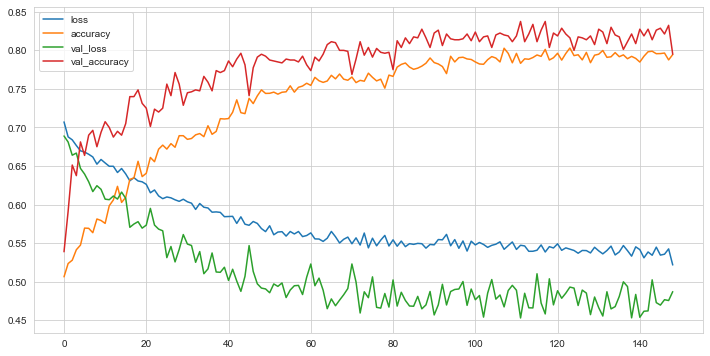

In [440]:
loss_df.plot();

In [441]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  1071.9171142578125
accuracy :  0.7310000061988831


In [442]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1394  213]
 [ 325   68]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1607
           1       0.24      0.17      0.20       393

    accuracy                           0.73      2000
   macro avg       0.53      0.52      0.52      2000
weighted avg       0.70      0.73      0.71      2000



In [446]:
df.drop('Exited', axis = 1).iloc[0:1, :]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.000,1,1,1,101348.880


### Prediction

In [450]:
customer = X.iloc[0:1, :]

In [451]:
customer = scaler.transform(pd.get_dummies(customer, drop_first=True))

In [455]:
(model.predict(customer) > 0.5).astype("int32")

array([[1]])

In [458]:
y.iloc[0]

1